# Telecom Churn Case Study

#### Problem Statement:

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition. 

#### There are various ways to define churn, such as:

**Revenue-based churn:** Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’.

 

The main shortcoming of this definition is that there are customers who only receive calls/SMSes from their wage-earning counterparts, i.e. they don’t generate revenue but use the services. For example, many users in rural areas only receive calls from their wage-earning siblings in urban areas.

 

**Usage-based churn:** Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

 

A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.

`This case study focuses on Usage base Churn`


Essentially, here we need to—

- predict which customers are at high risk of churn.

In [1]:
#Importing required libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler

import sklearn.preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import os

from fancyimpute import KNN
# hide warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Load the given Dataset & inspect

In [2]:
# reading the dataset
df = pd.read_csv("telecom_churn_data.csv")

In [3]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
df.shape

(99999, 226)

In [5]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [6]:
# To check each column information in dataframe head:
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)

In [7]:
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

#### Define any functions here

In [8]:
# drop columns by name and month index.
def dropColumns(df, colName):
    for i in range(6,10):
        df.drop(f"{colName}_{i}", inplace=True,axis=1)

In [9]:
# function gets missing values above a certain percentage
def FindMissingColumnsAbovePercentage(df, percent):
    result = round(100. * (df.isnull().sum() / df.shape[0]),2)
    print(f"Found {len(result.loc[result > percent])} columns that have missing percentage above {percent} % \n")
    print(f"{result.loc[result > percent]}")

In [10]:
# checking missing values on entire table
FindMissingColumnsAbovePercentage(df,0)

Found 166 columns that have missing percentage above 0 % 

loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou_6             3.94
loc_og_t2t_mou_7             3.86
loc_og_t2t_mou_8             5.38
loc_og_t2t_mou_9             7.75
loc_og_t2m_mou_6             3.94
loc_og_t2m_mou_7       

## Data Cleaning and Missing value Analysis

In [11]:
# let us get missing values of columns greater than 50%
FindMissingColumnsAbovePercentage(df, 50)

Found 40 columns that have missing percentage above 50 % 

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_8    73.66
date_of_last_rech_data_9    74.08
total_rech_data_6           74.85
total_rech_data_7           74.43
total_rech_data_8           73.66
total_rech_data_9           74.08
max_rech_data_6             74.85
max_rech_data_7             74.43
max_rech_data_8             73.66
max_rech_data_9             74.08
count_rech_2g_6             74.85
count_rech_2g_7             74.43
count_rech_2g_8             73.66
count_rech_2g_9             74.08
count_rech_3g_6             74.85
count_rech_3g_7             74.43
count_rech_3g_8             73.66
count_rech_3g_9             74.08
av_rech_amt_data_6          74.85
av_rech_amt_data_7          74.43
av_rech_amt_data_8          73.66
av_rech_amt_data_9          74.08
arpu_3g_6                   74.85
arpu_3g_7                   74.43
arpu_3g_8                   73.66
arpu_3g_9              

In [12]:
df[["total_rech_data_9", "date_of_last_rech_data_9","max_rech_data_9","count_rech_2g_9","count_rech_3g_9","av_rech_amt_data_9","arpu_3g_9","arpu_2g_9","night_pck_user_9","fb_user_9",
"total_rech_data_8", "date_of_last_rech_data_8","max_rech_data_8","count_rech_2g_8","count_rech_3g_8","av_rech_amt_data_8","arpu_3g_8","arpu_2g_8","night_pck_user_8","fb_user_8",
"total_rech_data_7", "date_of_last_rech_data_7","max_rech_data_7","count_rech_2g_7","count_rech_3g_7","av_rech_amt_data_7","arpu_3g_7","arpu_2g_7","night_pck_user_7","fb_user_7",
"total_rech_data_6", "date_of_last_rech_data_6","max_rech_data_6","count_rech_2g_6","count_rech_3g_6","av_rech_amt_data_6","arpu_3g_6","arpu_2g_6","night_pck_user_6","fb_user_6"]].describe()

,total_rech_data_9,max_rech_data_9,count_rech_2g_9,count_rech_3g_9,av_rech_amt_data_9,arpu_3g_9,arpu_2g_9,night_pck_user_9,fb_user_9,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,arpu_3g_8,arpu_2g_8,night_pck_user_8,fb_user_8,total_rech_data_7,max_rech_data_7,count_rech_2g_7,count_rech_3g_7,av_rech_amt_data_7,arpu_3g_7,arpu_2g_7,night_pck_user_7,fb_user_7,total_rech_data_6,max_rech_data_6,count_rech_2g_6,count_rech_3g_6,av_rech_amt_data_6,arpu_3g_6,arpu_2g_6,night_pck_user_6,fb_user_6
count,25922.000000,25922.00000,25922.000000,25922.000000,25922.000000,25922.000000,25922.000000,25922.000000,25922.000000,26339.000000,26339.000000,26339.000000,26339.000000,26339.000000,26339.000000,26339.000000,26339.000000,26339.000000,25571.000000,25571.000000,25571.000000,25571.000000,25571.000000,25571.000000,25571.000000,25571.000000,25571.000000,25153.000000,25153.000000,25153.000000,25153.000000,25153.000000,25153.000000,25153.000000,25153.000000,25153.000000
mean,2.441170,124.94144,1.781807,0.659363,192.734315,100.264116,93.712026,0.015971,0.860968,2.651999,125.717301,2.016288,0.635711,197.526489,91.173849,86.599478,0.020844,0.890808,2.666419,126.729459,2.044699,0.621720,200.981292,89.384120,85.914450,0.023034,0.908764,2.463802,126.393392,1.864668,0.599133,192.600982,89.555057,86.398003,0.025086,0.914404
std,2.516339,111.36376,2.214701,1.411513,188.400286,216.291992,171.384224,0.125366,0.345987,3.074987,109.437851,2.720132,1.422827,191.301305,188.180936,168.247852,0.142863,0.311885,3.031593,109.765267,2.768332,1.394524,196.791224,195.893924,176.379871,0.150014,0.287950,2.789128,108.477235,2.570254,1.274428,192.646318,193.124653,172.767523,0.156391,0.279772
min,1.000000,1.00000,0.000000,0.000000,1.000000,-71.090000,-45.740000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.500000,-24.490000,-55.830000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.500000,-26.040000,-15.480000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,-30.820000,-35.830000,0.000000,0.000000
25%,1.000000,25.00000,1.000000,0.000000,69.000000,0.000000,0.000000,0.000000,1.000000,1.000000,25.000000,1.000000,0.000000,87.000000,0.000000,0.000000,0.000000,1.000000,1.000000,25.000000,1.000000,0.000000,92.000000,0.000000,0.000000,0.000000,1.000000,1.000000,25.000000,1.000000,0.000000,82.000000,0.000000,0.000000,0.000000,1.000000
50%,2.000000,145.00000,1.000000,0.000000,164.000000,2.605000,14.800000,0.000000,1.000000,1.000000,145.000000,1.000000,0.000000,154.000000,0.880000,9.270000,0.000000,1.000000,1.000000,145.000000,1.000000,0.000000,154.000000,0.420000,8.810000,0.000000,1.000000,1.000000,145.000000,1.000000,0.000000,154.000000,0.480000,10.830000,0.000000,1.000000
75%,3.000000,179.00000,2.000000,1.000000,252.000000,140.010000,140.010000,0.000000,1.000000,3.000000,179.000000,2.000000,1.000000,252.000000,122.070000,122.070000,0.000000,1.000000,3.000000,177.000000,2.000000,1.000000,252.000000,119.560000,122.070000,0.000000,1.000000,3.000000,177.000000,2.000000,1.000000,252.000000,122.070000,122.070000,0.000000,1.000000
max,84.000000,1555.00000,40.000000,49.000000,4061.000000,13884.310000,3467.170000,1.000000,1.000000,60.000000,1555.000000,44.000000,45.000000,4076.000000,3716.900000,3483.170000,1.000000,1.000000,54.000000,1555.000000,48.000000,35.000000,4365.000000,4980.900000,4809.360000,1.000000,1.000000,61.000000,1555.000000,42.000000,29.000000,7546.000000,6362.280000,6433.760000,1.000000,1.000000


In [13]:
# Since percentages for each of >74% missing columns for months 6/7/8/9 is same. Lets check if all the columns have missing values in each column for month 6.

In [14]:
df.loc[df.total_rech_data_6.isnull() & df.date_of_last_rech_data_6.isnull() & df.max_rech_data_6.isnull() & df.count_rech_2g_6.isnull() & df.count_rech_3g_6.isnull() & df.av_rech_amt_data_6.isnull() & df.arpu_3g_6.isnull() & df.arpu_2g_6.isnull() & df.night_pck_user_6.isnull() & df.fb_user_6.isnull(), ["total_rech_data_6", "date_of_last_rech_data_6","max_rech_data_6","count_rech_2g_6","count_rech_3g_6","av_rech_amt_data_6","arpu_3g_6","arpu_2g_6","night_pck_user_6","fb_user_6"]]

,total_rech_data_6,date_of_last_rech_data_6,max_rech_data_6,count_rech_2g_6,count_rech_3g_6,av_rech_amt_data_6,arpu_3g_6,arpu_2g_6,night_pck_user_6,fb_user_6
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
99991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Okay, so there are about 74k Rows that have all the elements as zeros for the above column/ fields**

In [15]:
# Imputing missing values with 0 for all such columns.

In [16]:
df.loc[df.total_rech_data_6.isnull() & df.date_of_last_rech_data_6.isnull() & df.max_rech_data_6.isnull() & df.count_rech_2g_6.isnull() & df.count_rech_3g_6.isnull() & df.av_rech_amt_data_6.isnull() & df.arpu_3g_6.isnull() & df.arpu_2g_6.isnull() & df.night_pck_user_6.isnull() & df.fb_user_6.isnull(), ["total_rech_data_6", "date_of_last_rech_data_6","max_rech_data_6","count_rech_2g_6","count_rech_3g_6","av_rech_amt_data_6","arpu_3g_6","arpu_2g_6","night_pck_user_6","fb_user_6"]] = 0

In [17]:
df.loc[df.total_rech_data_7.isnull() & df.date_of_last_rech_data_7.isnull() & df.max_rech_data_7.isnull() & df.count_rech_2g_7.isnull() & df.count_rech_3g_7.isnull() & df.av_rech_amt_data_7.isnull() & df.arpu_3g_7.isnull() & df.arpu_2g_7.isnull() & df.night_pck_user_7.isnull() & df.fb_user_7.isnull(), ["total_rech_data_7", "date_of_last_rech_data_7","max_rech_data_7","count_rech_2g_7","count_rech_3g_7","av_rech_amt_data_7","arpu_3g_7","arpu_2g_7","night_pck_user_7","fb_user_7"]]

,total_rech_data_7,date_of_last_rech_data_7,max_rech_data_7,count_rech_2g_7,count_rech_3g_7,av_rech_amt_data_7,arpu_3g_7,arpu_2g_7,night_pck_user_7,fb_user_7
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
99993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df.loc[df.total_rech_data_7.isnull() & df.date_of_last_rech_data_7.isnull() & df.max_rech_data_7.isnull() & df.count_rech_2g_7.isnull() & df.count_rech_3g_7.isnull() & df.av_rech_amt_data_7.isnull() & df.arpu_3g_7.isnull() & df.arpu_2g_7.isnull() & df.night_pck_user_7.isnull() & df.fb_user_7.isnull(), ["total_rech_data_7", "date_of_last_rech_data_7","max_rech_data_7","count_rech_2g_7","count_rech_3g_7","av_rech_amt_data_7","arpu_3g_7","arpu_2g_7","night_pck_user_7","fb_user_7"]] = 0

In [19]:
df.loc[df.total_rech_data_7.isnull() & df.date_of_last_rech_data_7.isnull() & df.max_rech_data_7.isnull() & df.count_rech_2g_7.isnull() & df.count_rech_3g_7.isnull() & df.av_rech_amt_data_7.isnull() & df.arpu_3g_7.isnull() & df.arpu_2g_7.isnull() & df.night_pck_user_7.isnull() & df.fb_user_7.isnull(), ["total_rech_data_7", "date_of_last_rech_data_7","max_rech_data_7","count_rech_2g_7","count_rech_3g_7","av_rech_amt_data_7","arpu_3g_7","arpu_2g_7","night_pck_user_7","fb_user_7"]]

,total_rech_data_7,date_of_last_rech_data_7,max_rech_data_7,count_rech_2g_7,count_rech_3g_7,av_rech_amt_data_7,arpu_3g_7,arpu_2g_7,night_pck_user_7,fb_user_7


In [20]:
df.loc[df.total_rech_data_8.isnull() & df.date_of_last_rech_data_8.isnull() & df.max_rech_data_8.isnull() & df.count_rech_2g_8.isnull() & df.count_rech_3g_8.isnull() & df.av_rech_amt_data_8.isnull() & df.arpu_3g_8.isnull() & df.arpu_2g_8.isnull() & df.night_pck_user_8.isnull() & df.fb_user_8.isnull(), ["total_rech_data_8", "date_of_last_rech_data_8","max_rech_data_8","count_rech_2g_8","count_rech_3g_8","av_rech_amt_data_8","arpu_3g_8","arpu_2g_8","night_pck_user_8","fb_user_8"]]

,total_rech_data_8,date_of_last_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,arpu_3g_8,arpu_2g_8,night_pck_user_8,fb_user_8
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
99993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df.loc[df.total_rech_data_8.isnull() & df.date_of_last_rech_data_8.isnull() & df.max_rech_data_8.isnull() & df.count_rech_2g_8.isnull() & df.count_rech_3g_8.isnull() & df.av_rech_amt_data_8.isnull() & df.arpu_3g_8.isnull() & df.arpu_2g_8.isnull() & df.night_pck_user_8.isnull() & df.fb_user_8.isnull(), ["total_rech_data_8", "date_of_last_rech_data_8","max_rech_data_8","count_rech_2g_8","count_rech_3g_8","av_rech_amt_data_8","arpu_3g_8","arpu_2g_8","night_pck_user_8","fb_user_8"]] = 0

In [22]:
df.loc[df.total_rech_data_8.isnull() & df.date_of_last_rech_data_8.isnull() & df.max_rech_data_8.isnull() & df.count_rech_2g_8.isnull() & df.count_rech_3g_8.isnull() & df.av_rech_amt_data_8.isnull() & df.arpu_3g_8.isnull() & df.arpu_2g_8.isnull() & df.night_pck_user_8.isnull() & df.fb_user_8.isnull(), ["total_rech_data_8", "date_of_last_rech_data_8","max_rech_data_8","count_rech_2g_8","count_rech_3g_8","av_rech_amt_data_8","arpu_3g_8","arpu_2g_8","night_pck_user_8","fb_user_8"]]

,total_rech_data_8,date_of_last_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,arpu_3g_8,arpu_2g_8,night_pck_user_8,fb_user_8


In [23]:
df.loc[df.total_rech_data_9.isnull() & df.date_of_last_rech_data_9.isnull() & df.max_rech_data_9.isnull() & df.count_rech_2g_9.isnull() & df.count_rech_3g_9.isnull() & df.av_rech_amt_data_9.isnull() & df.arpu_3g_9.isnull() & df.arpu_2g_9.isnull() & df.night_pck_user_9.isnull() & df.fb_user_9.isnull(), ["total_rech_data_9", "date_of_last_rech_data_9","max_rech_data_9","count_rech_2g_9","count_rech_3g_9","av_rech_amt_data_9","arpu_3g_9","arpu_2g_9","night_pck_user_9","fb_user_9"]]

,total_rech_data_9,date_of_last_rech_data_9,max_rech_data_9,count_rech_2g_9,count_rech_3g_9,av_rech_amt_data_9,arpu_3g_9,arpu_2g_9,night_pck_user_9,fb_user_9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
99993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df.loc[df.total_rech_data_9.isnull() & df.date_of_last_rech_data_9.isnull() & df.max_rech_data_9.isnull() & df.count_rech_2g_9.isnull() & df.count_rech_3g_9.isnull() & df.av_rech_amt_data_9.isnull() & df.arpu_3g_9.isnull() & df.arpu_2g_9.isnull() & df.night_pck_user_9.isnull() & df.fb_user_9.isnull(), ["total_rech_data_9", "date_of_last_rech_data_9","max_rech_data_9","count_rech_2g_9","count_rech_3g_9","av_rech_amt_data_9","arpu_3g_9","arpu_2g_9","night_pck_user_9","fb_user_9"]] = 0

In [25]:
df.loc[df.total_rech_data_9.isnull() & df.date_of_last_rech_data_9.isnull() & df.max_rech_data_9.isnull() & df.count_rech_2g_9.isnull() & df.count_rech_3g_9.isnull() & df.av_rech_amt_data_9.isnull() & df.arpu_3g_9.isnull() & df.arpu_2g_9.isnull() & df.night_pck_user_9.isnull() & df.fb_user_9.isnull(), ["total_rech_data_9", "date_of_last_rech_data_9","max_rech_data_9","count_rech_2g_9","count_rech_3g_9","av_rech_amt_data_9","arpu_3g_9","arpu_2g_9","night_pck_user_9","fb_user_9"]]

,total_rech_data_9,date_of_last_rech_data_9,max_rech_data_9,count_rech_2g_9,count_rech_3g_9,av_rech_amt_data_9,arpu_3g_9,arpu_2g_9,night_pck_user_9,fb_user_9


In [26]:
df[["total_rech_data_9", "date_of_last_rech_data_9","max_rech_data_9","count_rech_2g_9","count_rech_3g_9","av_rech_amt_data_9","arpu_3g_9","arpu_2g_9","night_pck_user_9","fb_user_9",
"total_rech_data_8", "date_of_last_rech_data_8","max_rech_data_8","count_rech_2g_8","count_rech_3g_8","av_rech_amt_data_8","arpu_3g_8","arpu_2g_8","night_pck_user_8","fb_user_8",
"total_rech_data_7", "date_of_last_rech_data_7","max_rech_data_7","count_rech_2g_7","count_rech_3g_7","av_rech_amt_data_7","arpu_3g_7","arpu_2g_7","night_pck_user_7","fb_user_7",
"total_rech_data_6", "date_of_last_rech_data_6","max_rech_data_6","count_rech_2g_6","count_rech_3g_6","av_rech_amt_data_6","arpu_3g_6","arpu_2g_6","night_pck_user_6","fb_user_6"]].describe()

,total_rech_data_9,max_rech_data_9,count_rech_2g_9,count_rech_3g_9,av_rech_amt_data_9,arpu_3g_9,arpu_2g_9,night_pck_user_9,fb_user_9,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,arpu_3g_8,arpu_2g_8,night_pck_user_8,fb_user_8,total_rech_data_7,max_rech_data_7,count_rech_2g_7,count_rech_3g_7,av_rech_amt_data_7,arpu_3g_7,arpu_2g_7,night_pck_user_7,fb_user_7,total_rech_data_6,max_rech_data_6,count_rech_2g_6,count_rech_3g_6,av_rech_amt_data_6,arpu_3g_6,arpu_2g_6,night_pck_user_6,fb_user_6
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.00000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,0.632806,32.387644,0.461885,0.170922,49.961089,25.990724,24.292274,0.00414,0.223182,0.698517,33.113011,0.531075,0.167442,52.027022,24.014520,22.809665,0.005490,0.234632,0.681837,32.406314,0.522855,0.158982,51.393440,22.856642,21.969404,0.005890,0.232382,0.619726,31.792048,0.469025,0.150702,48.445409,22.526009,21.731907,0.006310,0.230002
std,1.669040,78.818696,1.371526,0.774557,127.804280,118.562650,96.437504,0.06421,0.416382,1.963417,78.872739,1.654565,0.782059,131.182609,104.593649,94.396902,0.073892,0.423771,1.924382,78.342435,1.659925,0.755537,132.629365,106.457258,96.746052,0.076521,0.422354,1.760541,77.248778,1.521915,0.689999,127.743863,104.360309,94.408718,0.079185,0.420836
min,0.000000,0.000000,0.000000,0.000000,0.000000,-71.090000,-45.740000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-24.490000,-55.830000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-26.040000,-15.480000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-30.820000,-35.830000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.00000,0.000000,1.000000,17.000000,0.000000,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000,1.000000,14.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,8.250000,0.000000,0.000000,0.000000,0.000000
max,84.000000,1555.000000,40.000000,49.000000,4061.000000,13884.310000,3467.170000,1.00000,1.000000,60.000000,1555.000000,44.000000,45.000000,4076.000000,3716.900000,3483.170000,1.000000,1.000000,54.000000,1555.000000,48.000000,35.000000,4365.000000,4980.900000,4809.360000,1.000000,1.000000,61.000000,1555.000000,42.000000,29.000000,7546.000000,6362.280000,6433.760000,1.000000,1.000000


### Handling Missing values across - Columns x Rows

### impute zeros for a column which has a NAN but is important.

### Drop those 'date' columns that has more than 70% NULLs, since we cannot do anything with a date column with more than 70% missing

In [27]:
# drop columns belonging to dates
dropColumns(df, 'last_date_of_month')
dropColumns(df, 'date_of_last_rech')
dropColumns(df, 'date_of_last_rech_data')

In [28]:
# checking missing values on entire table
FindMissingColumnsAbovePercentage(df,0)

Found 119 columns that have missing percentage above 0 % 

loc_og_t2o_mou      1.02
std_og_t2o_mou      1.02
loc_ic_t2o_mou      1.02
onnet_mou_6         3.94
onnet_mou_7         3.86
onnet_mou_8         5.38
onnet_mou_9         7.75
offnet_mou_6        3.94
offnet_mou_7        3.86
offnet_mou_8        5.38
offnet_mou_9        7.75
roam_ic_mou_6       3.94
roam_ic_mou_7       3.86
roam_ic_mou_8       5.38
roam_ic_mou_9       7.75
roam_og_mou_6       3.94
roam_og_mou_7       3.86
roam_og_mou_8       5.38
roam_og_mou_9       7.75
loc_og_t2t_mou_6    3.94
loc_og_t2t_mou_7    3.86
loc_og_t2t_mou_8    5.38
loc_og_t2t_mou_9    7.75
loc_og_t2m_mou_6    3.94
loc_og_t2m_mou_7    3.86
loc_og_t2m_mou_8    5.38
loc_og_t2m_mou_9    7.75
loc_og_t2f_mou_6    3.94
loc_og_t2f_mou_7    3.86
loc_og_t2f_mou_8    5.38
loc_og_t2f_mou_9    7.75
loc_og_t2c_mou_6    3.94
loc_og_t2c_mou_7    3.86
loc_og_t2c_mou_8    5.38
loc_og_t2c_mou_9    7.75
loc_og_mou_6        3.94
loc_og_mou_7        3.86
loc_og_mou_8    

In [29]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 214 columns):
 #   Column              Dtype  
---  ------              -----  
 0   mobile_number       int64  
 1   circle_id           int64  
 2   loc_og_t2o_mou      float64
 3   std_og_t2o_mou      float64
 4   loc_ic_t2o_mou      float64
 5   arpu_6              float64
 6   arpu_7              float64
 7   arpu_8              float64
 8   arpu_9              float64
 9   onnet_mou_6         float64
 10  onnet_mou_7         float64
 11  onnet_mou_8         float64
 12  onnet_mou_9         float64
 13  offnet_mou_6        float64
 14  offnet_mou_7        float64
 15  offnet_mou_8        float64
 16  offnet_mou_9        float64
 17  roam_ic_mou_6       float64
 18  roam_ic_mou_7       float64
 19  roam_ic_mou_8       float64
 20  roam_ic_mou_9       float64
 21  roam_og_mou_6       float64
 22  roam_og_mou_7       float64
 23  roam_og_mou_8       float64
 24  roam_og_mou_9       float64

### These date columns will eventually go off

**let us inspect if there are rows where all fields are NULL and impute a zero or drop them**

In [30]:
df[df.isnull().all(axis=1)]

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g


**Ok No rows contain all zeros**

In [31]:
# Imputing missing values for columns with very less missing percentage using KNN

In [32]:
FindMissingColumnsAbovePercentage(df,0)

Found 119 columns that have missing percentage above 0 % 

loc_og_t2o_mou      1.02
std_og_t2o_mou      1.02
loc_ic_t2o_mou      1.02
onnet_mou_6         3.94
onnet_mou_7         3.86
onnet_mou_8         5.38
onnet_mou_9         7.75
offnet_mou_6        3.94
offnet_mou_7        3.86
offnet_mou_8        5.38
offnet_mou_9        7.75
roam_ic_mou_6       3.94
roam_ic_mou_7       3.86
roam_ic_mou_8       5.38
roam_ic_mou_9       7.75
roam_og_mou_6       3.94
roam_og_mou_7       3.86
roam_og_mou_8       5.38
roam_og_mou_9       7.75
loc_og_t2t_mou_6    3.94
loc_og_t2t_mou_7    3.86
loc_og_t2t_mou_8    5.38
loc_og_t2t_mou_9    7.75
loc_og_t2m_mou_6    3.94
loc_og_t2m_mou_7    3.86
loc_og_t2m_mou_8    5.38
loc_og_t2m_mou_9    7.75
loc_og_t2f_mou_6    3.94
loc_og_t2f_mou_7    3.86
loc_og_t2f_mou_8    5.38
loc_og_t2f_mou_9    7.75
loc_og_t2c_mou_6    3.94
loc_og_t2c_mou_7    3.86
loc_og_t2c_mou_8    5.38
loc_og_t2c_mou_9    7.75
loc_og_mou_6        3.94
loc_og_mou_7        3.86
loc_og_mou_8    

### Ok, So all the columns are now having < 7% of NULLs. 

#### To be able to handle the NULL values with Advanced imputation techniques, we need:
- Apply Advanced Technique like - IterativeImputer  or
- Apply Advanced Technique like - KNN

If we go with KNN , we have run into issues applying KNN on a rowset of 99999 as it would require (99999, 99999) matrix of 32 bit which is about 37GB.!

So we first identify and filter dataset for High value customers and see if we reduce the number of rows, and then perform the KNN on it. this is only to mitigate the problem with Horse power/ computational requirement both in local PC and in Google Colab.

### Create new derived variables of importance

### Derived Variable Creations

**Create New Variable for average recharge amount for mo. 6 & 7**

In [33]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 214 columns):
 #   Column              Dtype  
---  ------              -----  
 0   mobile_number       int64  
 1   circle_id           int64  
 2   loc_og_t2o_mou      float64
 3   std_og_t2o_mou      float64
 4   loc_ic_t2o_mou      float64
 5   arpu_6              float64
 6   arpu_7              float64
 7   arpu_8              float64
 8   arpu_9              float64
 9   onnet_mou_6         float64
 10  onnet_mou_7         float64
 11  onnet_mou_8         float64
 12  onnet_mou_9         float64
 13  offnet_mou_6        float64
 14  offnet_mou_7        float64
 15  offnet_mou_8        float64
 16  offnet_mou_9        float64
 17  roam_ic_mou_6       float64
 18  roam_ic_mou_7       float64
 19  roam_ic_mou_8       float64
 20  roam_ic_mou_9       float64
 21  roam_og_mou_6       float64
 22  roam_og_mou_7       float64
 23  roam_og_mou_8       float64
 24  roam_og_mou_9       float64

**Closely inspecting, we find that there are columns by month name, for consistency, let us rename them to _6, _7,_8,_9**

In [34]:
df.rename(columns={'aug_vbc_3g':'vbc_3g_8','jul_vbc_3g':'vbc_3g_7','jun_vbc_3g':'vbc_3g_6','sep_vbc_3g':'vbc_3g_9'}, inplace=True)

**Create volume data total usage 2g + 3g**

In [35]:
# let us drop the other columns and then arrive at new columns
for i in range(6,10):
    df['vol_data_mb_' + str(i)] = df['vol_2g_mb_' + str(i)] + df['vol_3g_mb_' + str(i)]
    df.drop(['vol_2g_mb_' + str(i), 'vol_3g_mb_' +str(i)],axis=1,inplace=True)

**Create total recharge done by customer (2g, 3g)**

In [36]:
# club total recharge counts together
for i in range(6,10):
    df['total_rech_count_' + str(i)] = df['count_rech_2g_' + str(i)] + df['count_rech_3g_' + str(i)]

# drop the columns
dropColumns(df, 'count_rech_2g')
dropColumns(df, 'count_rech_3g')

**Create average recharge amount feature**

In [37]:
# arrive at the average recharge for month 6 & 7.
df['avg_rchg_amt_6'] = round((df['total_rech_amt_6'] / df['total_rech_num_6']),2)

In [38]:
# arrive at the average recharge for month 6 & 7.
df['avg_rchg_amt_7'] = round((df['total_rech_amt_7'] / df['total_rech_num_7']),2)

**Create New variable that indicate totals for months 6,7,8,9**

In [39]:
df['total_rch_6'] = df['total_rech_amt_6'] + df['total_rech_data_6']
df['total_rch_7'] = df['total_rech_amt_7'] + df['total_rech_data_7']
df['total_rch_8'] = df['total_rech_amt_8'] + df['total_rech_data_8']
df['total_rch_9'] = df['total_rech_amt_9'] + df['total_rech_data_9']

In [40]:
# drop these columns as we created a derived feature out of it.
dropColumns(df, "total_rech_amt")

**Calculate Average of 6 & 7 and get 70th percentile**

In [41]:
# calculate average recharge for month 6 & 7
avg_6_7 = (df['total_rch_6'] + df['total_rch_7']) / 2

#70th percentile for finding high-value customer
hvc70pct = np.percentile(avg_6_7, 70)

In [42]:
# calculate high value customers
hvcustomers = df[avg_6_7 >= hvc70pct]

In [43]:
#reset index
hvcustomers = hvcustomers.reset_index(drop=True)

In [44]:
hvcustomers.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9,vol_data_mb_6,vol_data_mb_7,vol_data_mb_8,vol_data_mb_9,total_rech_count_6,total_rech_count_7,total_rech_count_8,total_rech_count_9,avg_rchg_amt_6,avg_rchg_amt_7,total_rch_6,total_rch_7,total_rch_8,total_rch_9
0,7000701601,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,0.0,0.0,0.0,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.00,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,126.99,141.33,NaN,52.19,34.24,22.21,NaN,0.0,0.0,0.0,NaN,180.54,173.08,193.94,NaN,626.46,558.04,428.74,0.00,0.21,0.0,0.0,NaN,2.06,14.53,31.59,NaN,15.74,15.19,15.14,NaN,5,5,7,3,1580,790,1580,0,0,0,779,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,802,57.74,19.38,18.74,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,316.0

In [45]:
hvcustomers.shape

(30019, 208)

In [46]:
100*hvcustomers.night_pck_user_6.value_counts(normalize=True)

0.0    98.953996
1.0     1.046004
Name: night_pck_user_6, dtype: float64

In [47]:
100*hvcustomers.night_pck_user_7.value_counts(normalize=True)

0.0    99.007295
1.0     0.992705
Name: night_pck_user_7, dtype: float64

In [48]:
100*hvcustomers.night_pck_user_8.value_counts(normalize=True)

0.0    99.063926
1.0     0.936074
Name: night_pck_user_8, dtype: float64

In [49]:
100*hvcustomers.night_pck_user_9.value_counts(normalize=True)

0.0    99.253806
1.0     0.746194
Name: night_pck_user_9, dtype: float64

In [50]:
hvcustomers.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9,vol_data_mb_6,vol_data_mb_7,vol_data_mb_8,vol_data_mb_9,total_rech_count_6,total_rech_count_7,total_rech_count_8,total_rech_count_9,avg_rchg_amt_6,avg_rchg_amt_7,total_rch_6,total_rch_7,total_rch_8,total_rch_9
count,3.001900e+04,30019.0,29905.0,29905.0,29905.0,30019.000000,30019.000000,30019.000000,30019.000000,29703.000000,29716.000000,29079.000000,28315.000000,29703.000000,29716.000000,29079.000000,28315.000000,29703.000000,29716.000000,29079.000000,28315.000000,29703.000000,29716.000000,29079.000000,28315.000000,29703.000000,29716.000000,29079.000000,28315.000000,29703.000000,29716.000000,29079.000000,28315.000000,29703.000000,29716.000000,29079.000000,28315.000000,29703.000000,29716.000000,29079.000000,28315.000000,29703.000000,29716.000000,29079.000000,28315.00000,29703.000000,29716.000000,29079.000000,28315.000000,29703.000000,29716.000000,29079.000000,28315.000000,29703.000000,29716.000000,29079.000000,28315.000000,29703.0,29716.0,29079.0,28315.0,29703.000000,29716.000000,29079.000000,28315.000000,29703.000000,29716.000000,29079.000000,28315.000000,29703.000000,29716.000000,29079.000000,28315.000000,29703.000000,29716.000000,29079.000000,28315.000000,30019.000000,30019

In [51]:
# loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9
# Above columns have completely zero values, can be removed. 
# Also, mobile_number and circle_id will not be helpful in prediction. Circle is same value for all.
# 'night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9' categorical variables are highly skewed, lets remove them as they will not be helpful in prediction

In [52]:
hvcustomers.drop(['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_og_t2c_mou_9','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8','std_ic_t2o_mou_9','night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9','mobile_number','circle_id'],axis=1,inplace=True)

In [53]:
hvcustomers.shape

(30019, 191)

In [54]:
print(f"Number of Customers retained as High-Value Customers {round( 100. * hvcustomers.shape[0] / len(df),2)} %")
print(f"Number of Customers retained as High-Value Customers {hvcustomers.shape[0]}")

Number of Customers retained as High-Value Customers 30.02 %
Number of Customers retained as High-Value Customers 30019


In [55]:
cols = ['fb_user_6','fb_user_7','fb_user_8','monthly_2g_6','monthly_2g_7','monthly_2g_8','monthly_3g_6','monthly_3g_7','monthly_3g_8']

In [56]:
col_dummies = pd.get_dummies(hvcustomers[cols],drop_first=True)

In [57]:
col_dummies

,fb_user_6,fb_user_7,fb_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8
0,0.0,0.0,0.0,0,0,0,0,0,0
1,0.0,1.0,1.0,0,1,0,0,0,0
2,0.0,0.0,1.0,0,0,0,0,0,0
3,0.0,0.0,0.0,0,0,0,0,0,0
4,0.0,0.0,0.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
30014,0.0,0.0,0.0,0,0,0,0,0,0
30015,0.0,0.0,0.0,0,0,0,0,0,0
30016,1.0,1.0,1.0,0,0,0,0,0,0
30017,0.0,1.0,1.0,0,1,1,0,0,0


In [58]:
hvcustomers[cols].describe()

,fb_user_6,fb_user_7,fb_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8
count,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000
mean,0.342150,0.347014,0.328992,0.124988,0.131417,0.114194,0.174156,0.185349,0.173423
std,0.474437,0.476028,0.469855,0.374723,0.387722,0.357409,0.574618,0.620854,0.583125
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,4.000000,5.000000,5.000000,14.000000,16.000000,16.000000


_closely looking at the dummies, it looks like the dummies have only 2 levels a zero or a max. I think we can ignore creation of dummies for this reason as it will only branch out 2 variables and drop one of them(drop_first=True), which is going to yeild us same result_

**Retained about 30k rows which are High value Customers** <br>
Number of High-Value Customers: ~30k (out of 99999 customers)

**Ok, so a 30k rows dataset on KNN would create a matrix of 32 bits x (30000,30000) which is approximately 4 GB of RAM  let us hope it works now!**

**Ideally, this should have been applied on full dataset and then split the High-value customers. This is done due to Horse power limitations running such a algorithm on system and also Google Colab fails with free edition to run this system. (python uses 2x the required memory to run KNN.**

In [59]:
# lets log the time, wall(%time) time doesnt work looks like
import time
start = time.time()
# Apply KNN for this dataset with KNN = 3.
x_knn = pd.DataFrame(KNN(3).fit_transform(hvcustomers))

# assign back the column names.
x_knn.columns = hvcustomers.columns

# end time capture.
end = time.time()
# print the total time
print(f"Total time of execution taken is {round((end - start) / 60.0, 2)} Minutes")

Imputing row 1/30019 with 27 missing, elapsed time: 746.785
Imputing row 101/30019 with 54 missing, elapsed time: 746.814
Imputing row 201/30019 with 27 missing, elapsed time: 746.869
Imputing row 301/30019 with 0 missing, elapsed time: 746.906
Imputing row 401/30019 with 0 missing, elapsed time: 746.914
Imputing row 501/30019 with 0 missing, elapsed time: 746.948
Imputing row 601/30019 with 0 missing, elapsed time: 746.976
Imputing row 701/30019 with 0 missing, elapsed time: 746.998
Imputing row 801/30019 with 0 missing, elapsed time: 747.020
Imputing row 901/30019 with 0 missing, elapsed time: 747.046
Imputing row 1001/30019 with 0 missing, elapsed time: 747.058
Imputing row 1101/30019 with 0 missing, elapsed time: 747.138
Imputing row 1201/30019 with 0 missing, elapsed time: 747.216
Imputing row 1301/30019 with 0 missing, elapsed time: 747.239
Imputing row 1401/30019 with 0 missing, elapsed time: 747.263
Imputing row 1501/30019 with 0 missing, elapsed time: 747.316
Imputing row 1601

Imputing row 13301/30019 with 0 missing, elapsed time: 751.477
Imputing row 13401/30019 with 0 missing, elapsed time: 751.527
Imputing row 13501/30019 with 0 missing, elapsed time: 751.542
Imputing row 13601/30019 with 0 missing, elapsed time: 751.559
Imputing row 13701/30019 with 0 missing, elapsed time: 751.584
Imputing row 13801/30019 with 0 missing, elapsed time: 751.601
Imputing row 13901/30019 with 0 missing, elapsed time: 751.624
Imputing row 14001/30019 with 0 missing, elapsed time: 751.656
Imputing row 14101/30019 with 0 missing, elapsed time: 751.682
Imputing row 14201/30019 with 0 missing, elapsed time: 751.696
Imputing row 14301/30019 with 0 missing, elapsed time: 751.721
Imputing row 14401/30019 with 27 missing, elapsed time: 751.752
Imputing row 14501/30019 with 0 missing, elapsed time: 751.775
Imputing row 14601/30019 with 0 missing, elapsed time: 751.846
Imputing row 14701/30019 with 0 missing, elapsed time: 751.874
Imputing row 14801/30019 with 54 missing, elapsed time

Imputing row 26401/30019 with 0 missing, elapsed time: 755.360
Imputing row 26501/30019 with 108 missing, elapsed time: 755.413
Imputing row 26601/30019 with 0 missing, elapsed time: 755.442
Imputing row 26701/30019 with 0 missing, elapsed time: 755.495
Imputing row 26801/30019 with 0 missing, elapsed time: 755.546
Imputing row 26901/30019 with 0 missing, elapsed time: 755.612
Imputing row 27001/30019 with 0 missing, elapsed time: 755.665
Imputing row 27101/30019 with 0 missing, elapsed time: 755.686
Imputing row 27201/30019 with 0 missing, elapsed time: 755.740
Imputing row 27301/30019 with 0 missing, elapsed time: 755.755
Imputing row 27401/30019 with 0 missing, elapsed time: 755.793
Imputing row 27501/30019 with 0 missing, elapsed time: 755.797
Imputing row 27601/30019 with 0 missing, elapsed time: 755.808
Imputing row 27701/30019 with 0 missing, elapsed time: 755.846
Imputing row 27801/30019 with 0 missing, elapsed time: 755.899
Imputing row 27901/30019 with 0 missing, elapsed time

## Let us go ahead apply the KNN here

In [60]:
master = x_knn.copy()

In [61]:
# check for NULLs on KNN output.
FindMissingColumnsAbovePercentage(master, 0)

Found 0 columns that have missing percentage above 0 % 

Series([], dtype: float64)


In [62]:
master.shape

(30019, 191)

In [63]:
master.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9,vol_data_mb_6,vol_data_mb_7,vol_data_mb_8,vol_data_mb_9,total_rech_count_6,total_rech_count_7,total_rech_count_8,total_rech_count_9,avg_rchg_amt_6,avg_rchg_amt_7,total_rch_6,total_rch_7,total_rch_8,total_rch_9
0,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,43.747088,453.43,567.16,325.91,266.276064,16.23,33.49,31.64,43.978647,23.74,12.59,38.06,67.39151,51.39,31.38,40.28,28.528381,308.63,447.38,162.28,100.459983,62.13,55.14,53.23,18.873868,0.0,0.0,0.00,0.0,422.16,533.91,255.79,147.872293,4.30,23.29,12.01,3.369424,49.89,31.76,49.14,58.42208,6.66,20.08,16.68,0.113083,60.86,75.14,77.84,61.911417,0.0,0.18,10.01,31.181917,4.50,0.00,6.50,2.497309,0.00,0.0,0.0,0.0,487.53,609.24,350.16,0.00,58.14,32.26,27.31,26.929065,217.56,221.49,121.19,108.221511,152.16,101.46,39.53,12.341241,427.88,355.23,188.04,147.502245,36.89,11.83,30.39,14.420567,91.44,126.99,141.33,32.149908,52.19,34.24,22.21,6.085876,180.54,173.08,193.94,52.663179,626.46,558.04,428.74,0.00,0.21,0.0,0.0,0.0,2.06,14.53,31.59,68.894674,15.74,15.19,15.14,0.00,5.0,5.0,7.0,3.0,1580.0,790.0,1580.0,0.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,802.0,57.74,19.38,18.74,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,316.00,158.00,1580.0,790.0,3638.0,0.0
1,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.460000,94.66,80.63,136.48,108.710000,0.00,0.00,0.00,0.000000,0

### We need to derive the Churn / no Churn status of a customer based on the 9th month data

In [64]:
FindMissingColumnsAbovePercentage(master, 0)

Found 0 columns that have missing percentage above 0 % 

Series([], dtype: float64)


In [65]:
master['churn'] = master['total_og_mou_9'] + master['total_ic_mou_9'] + master['vol_data_mb_9']

In [66]:
master['churn'] = master['churn'].apply(lambda x: 1 if x==0 else 0)

In [67]:
master['churn'].head(20)

0     1
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
Name: churn, dtype: int64

In [68]:
100* master['churn'].value_counts(normalize=True)

0    91.372131
1     8.627869
Name: churn, dtype: float64

#### Churn percentage is 8.63%

### Drop all columns that are for the 9th month

In [69]:
cols = master.filter(regex='_9').columns
cols

Index(['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9',
       'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9',
       'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9',
       'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9',
       'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9',
       'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9',
       'total_rech_num_9', 'max_rech_amt_9', 'last_day_rch_amt_9',
       'total_rech_data_9', 'max_rech_data_9', 'av_rech_amt_data_9',
       'arpu_3g_9', 'arpu_2g_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9',
       'sachet_3g_9', 'fb_user_9', 'vbc_3g_9', 'vol_data_mb_9',
       'total_rech_count_9', 'total_rch_9'],
      dtype='object')

In [70]:
master.drop(cols, inplace=True,axis=1)

In [71]:
master.shape

(30019, 145)

In [72]:
master.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vol_data_mb_6,vol_data_mb_7,vol_data_mb_8,total_rech_count_6,total_rech_count_7,total_rech_count_8,avg_rchg_amt_6,avg_rchg_amt_7,total_rch_6,total_rch_7,total_rch_8,churn
0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,1580.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,802.0,57.74,19.38,18.74,0.0,0.00,0.00,0.0,0.0,0.0,316.00,158.00,1580.0,790.0,3638.0,1
1,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19.0,21.0,14.0,90.0,154.0,30.0,50.0,0.0,10.0,0.0,2.0,3.0,0.0,154.0,23.0,0.0,177.0,69.0,0.0,0.0,19.83,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,315.0,21.03,910.65,122.16,0.0,1106.95,11.97,0.0,2.0,3.0,23.00,28.62,437.0,603.0,123.0,0
2,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.

In [73]:
master.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30019 entries, 0 to 30018
Data columns (total 145 columns):
 #   Column              Dtype  
---  ------              -----  
 0   arpu_6              float64
 1   arpu_7              float64
 2   arpu_8              float64
 3   onnet_mou_6         float64
 4   onnet_mou_7         float64
 5   onnet_mou_8         float64
 6   offnet_mou_6        float64
 7   offnet_mou_7        float64
 8   offnet_mou_8        float64
 9   roam_ic_mou_6       float64
 10  roam_ic_mou_7       float64
 11  roam_ic_mou_8       float64
 12  roam_og_mou_6       float64
 13  roam_og_mou_7       float64
 14  roam_og_mou_8       float64
 15  loc_og_t2t_mou_6    float64
 16  loc_og_t2t_mou_7    float64
 17  loc_og_t2t_mou_8    float64
 18  loc_og_t2m_mou_6    float64
 19  loc_og_t2m_mou_7    float64
 20  loc_og_t2m_mou_8    float64
 21  loc_og_t2f_mou_6    float64
 22  loc_og_t2f_mou_7    float64
 23  loc_og_t2f_mou_8    float64
 24  loc_og_t2c_mou_6    float64

### Exploratory Data Analysis

**Define all the functions that can be reused here.**

count    30019.000000
mean      1263.302842
std        975.140260
min        180.000000
25%        479.000000
50%        912.000000
75%       1921.000000
max       4321.000000
Name: aon, dtype: float64


(0.0, 2650.0)

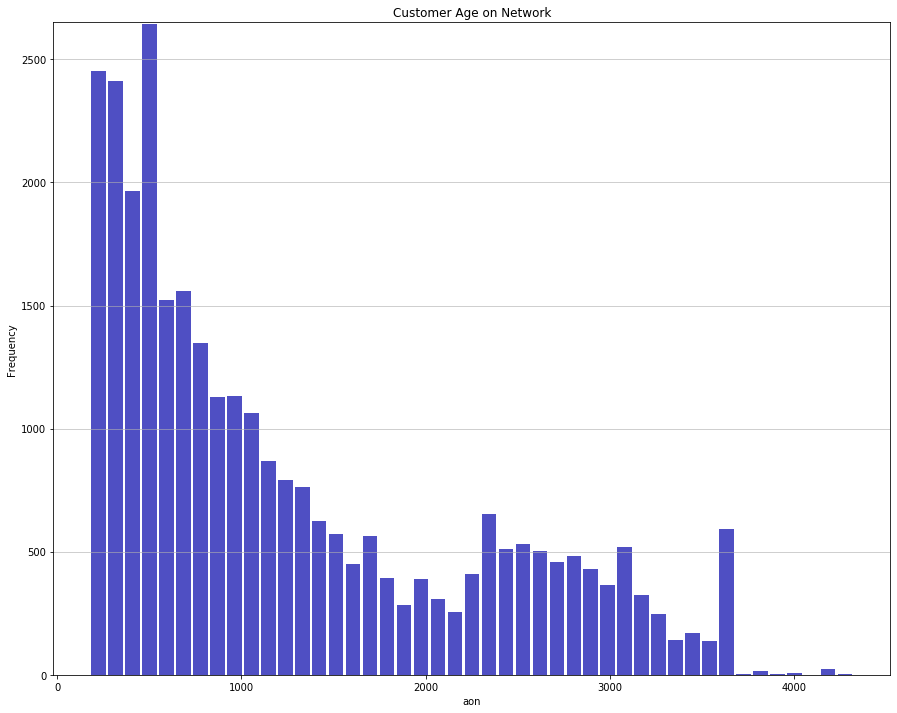

In [74]:
print(master.aon.describe())
# let us look at the age of customer on network
plt.figure(figsize=[15,12])
n, bins, patches = plt.hist(x=master.aon, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('aon')
plt.ylabel('Frequency')
plt.title('Customer Age on Network')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

**Customer Profile**: <br>
_Minimum Age on Network:_ 180  days <br>
_Average  Age on Network:_ 1200 days <br>
_Maximum Age on Network:_ 4300 days <br>
**75% of the high-value users are over 5 years** <br>
**25% of the high-value users are yet to complete 2nd year on network**<br>
**50% of the high-value users have completed 3 or more years**<br>


In [75]:
master.arpu_6.describe()

count    30019.000000
mean       587.227568
std        442.672305
min      -2258.709000
25%        364.082500
50%        495.645000
75%        703.852000
max      27731.088000
Name: arpu_6, dtype: float64

In [76]:
# let us create the year of association with the company based on age on network
master['age_assoc'] = (master.aon.astype(int) // 365) + 1

In [77]:
master.age_assoc.unique()

array([ 3,  1,  8,  2,  9,  4,  6, 10,  7,  5, 11, 12], dtype=int32)

**Get distribution of average association years v/s churn**

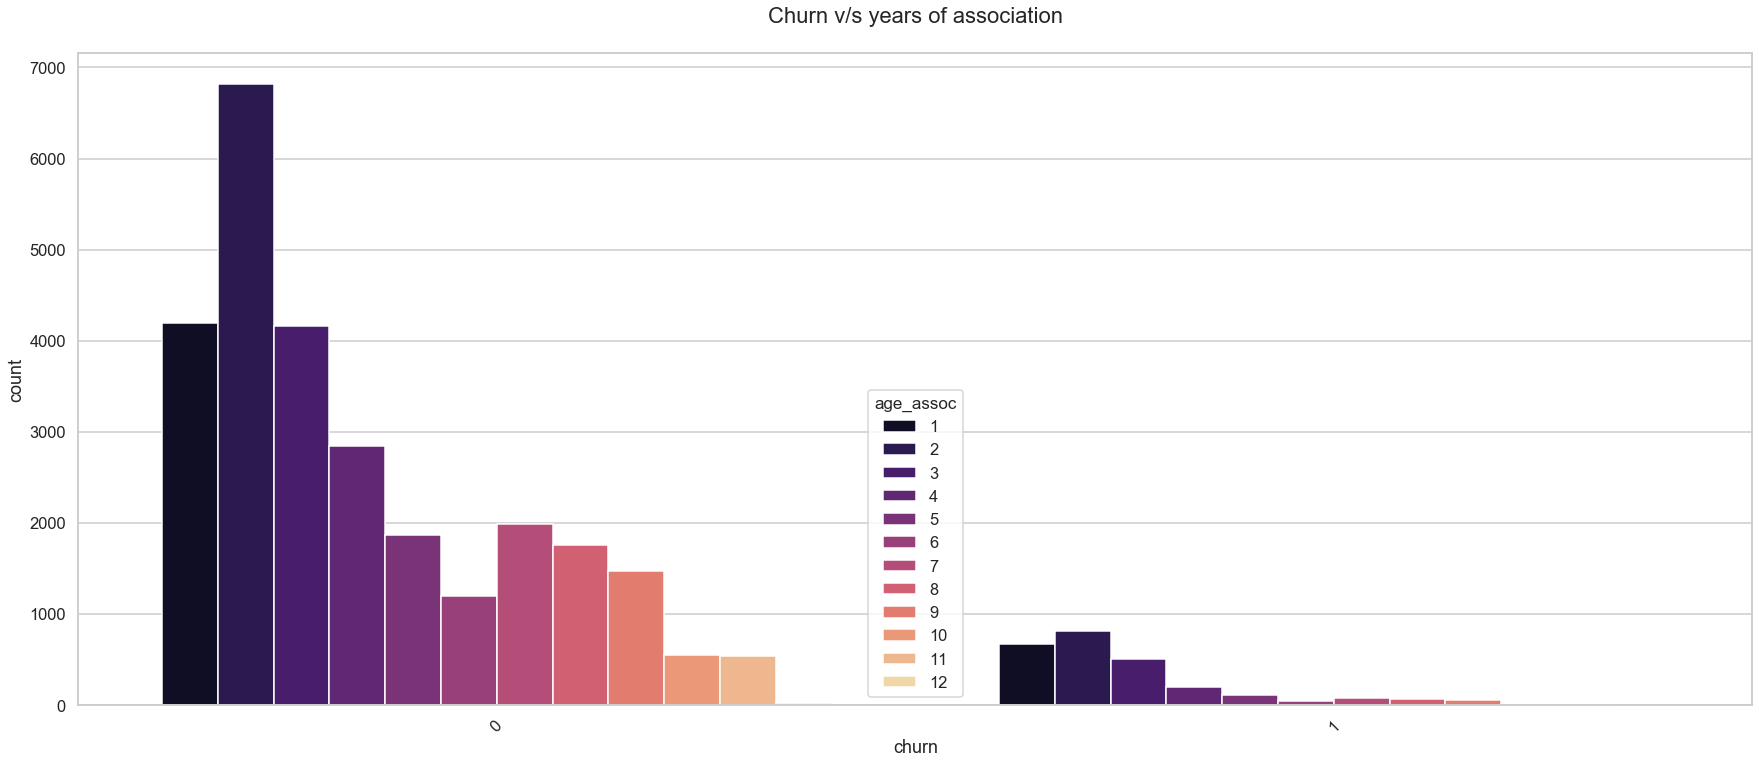

In [78]:
#get a distribution of gender v/s income spread
sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=[30,12])
plt.xticks(rotation=45)
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
sns.countplot(data = master, x= 'churn', 
              order= master['churn'].value_counts().index,hue = 'age_assoc',palette='magma') 
plt.title("Churn v/s years of association")
plt.show()

**It is evident that those who churned (~8.5%) are below 1000 days of association**

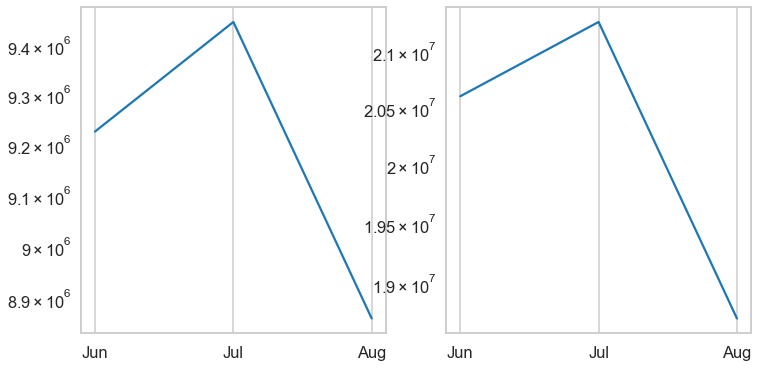

In [79]:
# lets plot incoming calls over month
ic_calls = master.filter(regex='total_ic_mou').columns
og_calls = master.filter(regex='total_og_mou').columns
plt.figure(figsize=[12,6])
plt.subplot(1,2,1)
plt.yscale('log')
plt.plot( ['Jun','Jul','Aug'], master[ic_calls].sum())
plt.subplot(1,2,2)
plt.plot( ['Jun','Jul','Aug'], master[og_calls].sum())
plt.yscale('log')
plt.show()

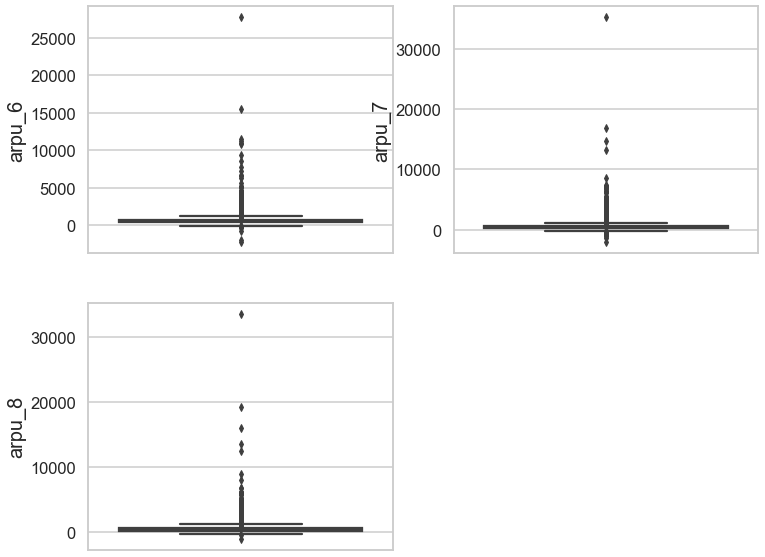

In [80]:
# lets look at few outliers.
plt.figure(figsize=[12,10])
plt.subplot(2,2,1)
sns.boxplot(master['arpu_6'],orient='v')
plt.subplot(2,2,2)
sns.boxplot(master['arpu_7'],orient='v')
plt.subplot(2,2,3)
sns.boxplot(master['arpu_8'], orient='v')

In [81]:
# age_assoc can be removed as we already have age (aon) column.

In [82]:
master.drop('age_assoc',axis=1,inplace=True)

In [83]:
master.shape

(30019, 145)

In [84]:
master.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vol_data_mb_6,vol_data_mb_7,vol_data_mb_8,total_rech_count_6,total_rech_count_7,total_rech_count_8,avg_rchg_amt_6,avg_rchg_amt_7,total_rch_6,total_rch_7,total_rch_8,churn
0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,1580.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,802.0,57.74,19.38,18.74,0.0,0.00,0.00,0.0,0.0,0.0,316.00,158.00,1580.0,790.0,3638.0,1
1,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19.0,21.0,14.0,90.0,154.0,30.0,50.0,0.0,10.0,0.0,2.0,3.0,0.0,154.0,23.0,0.0,177.0,69.0,0.0,0.0,19.83,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,315.0,21.03,910.65,122.16,0.0,1106.95,11.97,0.0,2.0,3.0,23.00,28.62,437.0,603.0,123.0,0
2,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.

In [85]:
master['fb_user_6'].unique()

array([0., 1.])

In [86]:
master['sachet_3g_6'].unique()

array([ 0.,  1.,  3.,  8.,  4.,  2., 10.,  5., 13.,  7.,  6., 29., 16.,
       18., 12., 11.,  9., 23., 14., 19., 15., 21., 22., 17., 28.])

In [87]:
master['monthly_3g_6'].unique()

array([ 0.,  4.,  2.,  1.,  3.,  5.,  7.,  6.,  9.,  8., 11., 14.])

In [88]:
master['sachet_2g_6'].unique()

array([ 0.,  4.,  1.,  3.,  7., 12.,  5.,  2.,  6., 10.,  8., 16.,  9.,
       19., 11., 22., 14., 20., 13., 17., 18., 25., 21., 32., 15., 39.,
       24., 27., 30., 42., 34.])

In [89]:
cat_cols =  ['fb_user_6','fb_user_7','fb_user_8']

In [90]:
master[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30019 entries, 0 to 30018
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   fb_user_6  30019 non-null  float64
 1   fb_user_7  30019 non-null  float64
 2   fb_user_8  30019 non-null  float64
dtypes: float64(3)
memory usage: 703.7 KB


In [91]:
# Above categorical variables are binary, so just need to change datatype

In [92]:
master[cat_cols] = master[cat_cols].apply(lambda column: column.astype("category"), axis=0)
master[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30019 entries, 0 to 30018
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   fb_user_6  30019 non-null  category
 1   fb_user_7  30019 non-null  category
 2   fb_user_8  30019 non-null  category
dtypes: category(3)
memory usage: 88.4 KB


In [93]:
master.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vol_data_mb_6,vol_data_mb_7,vol_data_mb_8,total_rech_count_6,total_rech_count_7,total_rech_count_8,avg_rchg_amt_6,avg_rchg_amt_7,total_rch_6,total_rch_7,total_rch_8,churn
count,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.00000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.00000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.00000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.00000,30019.000000,30019.000000,30019.000000,30019.000000
mean,587.227568,589.069327,534.740792,296.534611,304.521332,268.221705,418.856669,424.513306,376.460810,17.711

In [94]:
master.shape

(30019, 145)

### Outlier Treatment

In [95]:
# We will treat the outliers within soft range 1-99 quantiles.

In [96]:
for col in master.columns:
    if col not in cat_cols:
        q1 = master[col].quantile(0.01)
        master[col][master[col]<=q1]=q1
        q4 = master[col].quantile(0.99)
        master[col][master[col]>=q4]=q4

In [97]:
master.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vol_data_mb_6,vol_data_mb_7,vol_data_mb_8,total_rech_count_6,total_rech_count_7,total_rech_count_8,avg_rchg_amt_6,avg_rchg_amt_7,total_rch_6,total_rch_7,total_rch_8,churn
count,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.00000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.0,30019.0,30019.000000,30019.000000,30019.000000,30019.000000,30019.00000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000,30019.000000
mean,577.763806,579.591053,524.303459,287.858478,295.224131,258.947979,411.068110,415.927265,366.516031,15.046081,10.7

In [98]:
# Since categorical variables are binary (0,1), dummy variables creation is not required.

In [99]:
# Putting feature variable to X
X = master.drop(['churn'], axis=1)
X.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vol_data_mb_6,vol_data_mb_7,vol_data_mb_8,total_rech_count_6,total_rech_count_7,total_rech_count_8,avg_rchg_amt_6,avg_rchg_amt_7,total_rch_6,total_rch_7,total_rch_8
0,1069.180,1349.85000,1987.83952,57.84,54.68,52.29,453.43,567.1600,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.060,14.53,31.5900,15.7400,15.19,15.14,5.0,5.0,7.0,1000.0,790.0,951.0,0.0,0.0,619.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,802.0,57.74,19.38,18.74,0.0,0.00,0.00,0.0,0.0,0.0,316.00,158.00,1580.0,790.0,2342.64
1,378.721,492.22300,137.36200,413.69,351.03,35.08,94.66,80.6300,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.000,0.00,0.0000,0.0000,0.00,0.00,19.0,21.0,14.0,90.0,154.0,30.0,50.0,0.0,10.0,0.0,2.0,3.0,0.0,154.0,23.0,0.0,177.0,69.0,0.0,0.0,19.83,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,315.0,21.03,910.65,122.16,0.0,1106.95,11.97,0.0,2.0,3.0,23.00,28.62,437.0,603.0,123.00
2,492.846,205.67100,593.26000,501.76,108.39,534.24,413.31,119.2800,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67

In [100]:
# Putting response variable to y
y = master['churn']
y.head()

0    1
1    0
2    0
3    0
4    0
Name: churn, dtype: int64

### Feature Scaling

In [101]:
# Scaling all variabls to make them comparable and easy to interpret

In [102]:
X_num_col=[]

In [103]:
for col1 in X.columns:
    if col1 not in cat_cols:
        X_num_col.append(col1)

In [104]:
len(X_num_col)

141

In [105]:
scaler = StandardScaler()
X[X_num_col] = scaler.fit_transform(X[X_num_col])
X.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vol_data_mb_6,vol_data_mb_7,vol_data_mb_8,total_rech_count_6,total_rech_count_7,total_rech_count_8,avg_rchg_amt_6,avg_rchg_amt_7,total_rch_6,total_rch_7,total_rch_8
0,1.462861,2.278170,3.948341,-0.568349,-0.573320,-0.517111,0.100630,0.351540,-0.100383,0.022922,0.553720,0.511511,-0.026609,-0.093938,0.319965,-0.220735,-0.349875,-0.267383,0.621810,1.296521,-0.007208,3.826847,3.316958,3.399488,-0.338445,-0.345864,-0.337817,0.447110,0.803571,0.002494,-0.498714,-0.453062,-0.433478,-0.406031,-0.458676,-0.360645,0.854224,3.138510,2.914257,-0.587283,-0.570354,-0.486885,-0.165548,-0.130334,2.585189,-0.074408,-0.500892,0.033038,-0.387919,0.0,0.0,-0.311413,-0.141966,-0.424606,-0.049387,-0.318317,-0.343170,0.343359,0.365316,-0.158563,4.423769,2.639833,0.894182,0.707831,0.423170,-0.156554,0.747542,-0.055133,0.578783,1.073500,1.603610,2.046675,6.695139,4.096656,2.938846,1.518103,1.342067,1.760005,1.027872,0.779102,0.443077,0.981695,-0.206309,-0.262124,-0.194930,0.162256,0.692588,5.389166,4.160589,4.936417,-0.810456,-0.768726,-0.355578,5.491875,3.972416,5.455156,-0.917317,-0.901440,4.780455,-0.51347,-0.514948,-0.527274,-0.585475,-0.59324,-0.570303,-0.550836,-0.556116,-0.538041,-0.364496,-0.366626,-0.359934,-0.387837,-0.385481,-0.374848,-0.338286,-0.344176,-0.324697,-0.335672,-0.352937,-0.373184,-0.328992,-0.333149,-0.324386,-0.235337,-0.233752,-0.218425,0.0,0.0,0.0,-0.473347,-0.197321,-0.317021,-0.299167,-0.460423,-0.467891,-0.450443,-0.51347,-0.514948,-0.527274,4.480827,1.290769,2.209785,0.252682,3.880352
1,-0.592516,-0.258406,-1.043894,0.310915,0.133009,-0.560175,-0.751622,-0.779398,-0.568677,-0.291314,-0.262776,-0.267937,-0.309122,-0.285024,-0.285592,1.315725,0.828761,-0.459712,-0.446027,-0.508590,-0.551733,-0.431922,-0.436546,-0.425629,-0.338445,-0.345864,1.270668,0.312546,0.036480,-0.614640,-0.184003,-0.156607,-0.403384,-0.507123,-0.516175,-0.281578,-0.248551,-0.245676,-0.242667,-0.462036,-0.452431,-0.449429,-0.165548,-0.167504,-0.156511,-0.464122,-0.500892,0.337636,-0.387919,0.0,0.0,-0.277135,-0.426324,-0.713650,-0.399061,-0.543214,-0.624537,-0.529713,-0.788494,-0.752403,-

### Handling Class Imbalance

In [106]:
# Churn percentage is around 8.63 which means there is high imbalance in data. 
# To remove bias towards a particular class present in Majority, we will use "SMOTE" method 

In [107]:
print("Before sampling the data for data imbalance correction the values are: \n")
100*y.value_counts(normalize=True)

Before sampling the data for data imbalance correction the values are: 



0    91.372131
1     8.627869
Name: churn, dtype: float64

In [108]:
from imblearn.over_sampling import SMOTE

In [109]:
smote = SMOTE(random_state=0)
X_smote, y_smote = smote.fit_resample(X, y)

In [110]:
X_smote.shape, y_smote.shape

((54858, 144), (54858,))

In [111]:
round(100. * X_smote.isnull().sum(axis=0) / len(X_smote.index), 2)

arpu_6                0.00
arpu_7                0.00
arpu_8                0.00
onnet_mou_6           0.00
onnet_mou_7           0.00
onnet_mou_8           0.00
offnet_mou_6          0.00
offnet_mou_7          0.00
offnet_mou_8          0.00
roam_ic_mou_6         0.00
roam_ic_mou_7         0.00
roam_ic_mou_8         0.00
roam_og_mou_6         0.00
roam_og_mou_7         0.00
roam_og_mou_8         0.00
loc_og_t2t_mou_6      0.00
loc_og_t2t_mou_7      0.00
loc_og_t2t_mou_8      0.00
loc_og_t2m_mou_6      0.00
loc_og_t2m_mou_7      0.00
loc_og_t2m_mou_8      0.00
loc_og_t2f_mou_6      0.00
loc_og_t2f_mou_7      0.00
loc_og_t2f_mou_8      0.00
loc_og_t2c_mou_6      0.00
loc_og_t2c_mou_7      0.00
loc_og_t2c_mou_8      0.00
loc_og_mou_6          0.00
loc_og_mou_7          0.00
loc_og_mou_8          0.00
std_og_t2t_mou_6      0.00
std_og_t2t_mou_7      0.00
std_og_t2t_mou_8      0.00
std_og_t2m_mou_6      0.00
std_og_t2m_mou_7      0.00
std_og_t2m_mou_8      0.00
std_og_t2f_mou_6      0.00
s

In [112]:
X_smote.fb_user_6.describe()

count     51719.0
unique        2.0
top           0.0
freq      37545.0
Name: fb_user_6, dtype: float64

In [113]:
# fill a zero for fb_user_6 as 0 is the top
X_smote.fb_user_6.fillna(0,inplace=True)

In [114]:
X_smote.fb_user_7.describe()

count     52130.0
unique        2.0
top           0.0
freq      38364.0
Name: fb_user_7, dtype: float64

In [115]:
# fill a zero for fb_user_7 as 0 is the top
X_smote.fb_user_7.fillna(0,inplace=True)

In [116]:
# fill a zero for fb_user_8 as 0 is the top
X_smote.fb_user_8.fillna(0,inplace=True)

In [117]:
FindMissingColumnsAbovePercentage(X_smote,0)

Found 0 columns that have missing percentage above 0 % 

Series([], dtype: float64)


In [118]:
print("Before sampling the data for data imbalance correction the values are: \n")
pd.Series(y_smote).value_counts()

Before sampling the data for data imbalance correction the values are: 



1    27429
0    27429
Name: churn, dtype: int64

### Test-Train Split

In [119]:
# Splitting the data into train and test (70-30 %)
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, train_size=0.7, test_size=0.3, random_state=100)

In [120]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(38400, 144)
(38400,)
(16458, 144)
(16458,)


## Modeling

#### We will create 4 models ( 1 without PCA and 3 with PCA)

### let us first apply PCA

In [121]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(random_state=42)

In [122]:
X_train.drop(cat_cols,axis=1,inplace=True)

In [123]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(random_state=42)

In [124]:
pca.components_

array([[ 3.68457092e-02,  7.81309744e-02,  1.15766953e-01, ...,
         3.44728363e-02,  7.62784937e-02,  1.11718053e-01],
       [ 1.05082410e-01,  1.62080774e-01,  1.59227978e-01, ...,
         1.01234655e-01,  1.56999113e-01,  1.53940522e-01],
       [ 1.04214638e-01,  1.53007853e-01,  9.96555855e-02, ...,
         9.97894640e-02,  1.47314631e-01,  9.87557885e-02],
       ...,
       [-0.00000000e+00,  3.77255352e-17, -9.26656811e-17, ...,
        -6.30336329e-17, -1.52120662e-17,  8.47334378e-17],
       [-0.00000000e+00,  9.81098515e-18, -1.12527103e-16, ...,
        -1.41452867e-17, -9.73800447e-17, -2.49596953e-17],
       [-0.00000000e+00,  1.60023272e-17,  4.09712433e-17, ...,
         1.65330353e-17, -1.71988705e-17, -4.04860279e-17]])

In [125]:
pca.explained_variance_ratio_

array([1.29743053e-01, 9.39739632e-02, 7.33101236e-02, 5.83890633e-02,
       4.31723321e-02, 4.04319575e-02, 3.83051596e-02, 3.68594249e-02,
       2.92546507e-02, 2.18254991e-02, 1.97385953e-02, 1.86427180e-02,
       1.74152129e-02, 1.69611354e-02, 1.51501285e-02, 1.46311728e-02,
       1.37530296e-02, 1.35998560e-02, 1.26472373e-02, 1.14408422e-02,
       1.10551328e-02, 1.04997162e-02, 9.45894228e-03, 9.06997560e-03,
       8.90577234e-03, 8.35631829e-03, 7.90279619e-03, 7.54205967e-03,
       7.33392164e-03, 7.09131668e-03, 6.87386541e-03, 6.72250873e-03,
       6.47673469e-03, 6.41794651e-03, 6.29212637e-03, 5.96055802e-03,
       5.81862236e-03, 5.64965435e-03, 5.41251328e-03, 5.16827611e-03,
       5.03974209e-03, 4.89668362e-03, 4.60972037e-03, 4.48518840e-03,
       4.38827089e-03, 3.99364869e-03, 3.88975614e-03, 3.82740039e-03,
       3.70031899e-03, 3.64822735e-03, 3.48575259e-03, 3.33818681e-03,
       3.09818683e-03, 3.03790114e-03, 2.94480104e-03, 2.84865818e-03,
      

In [126]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

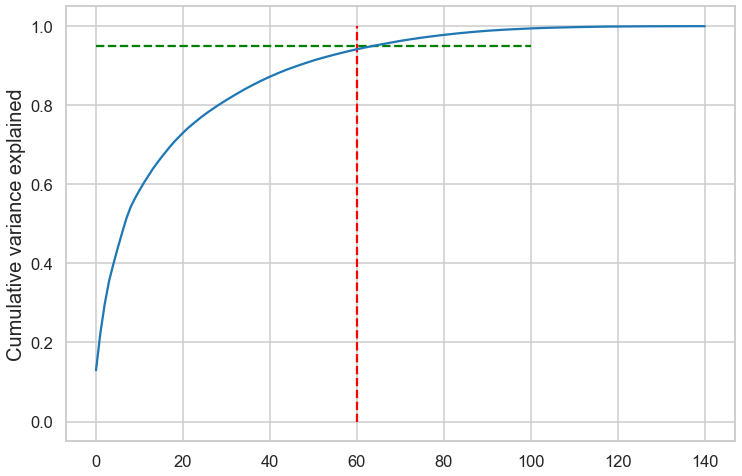

In [127]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=60, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=100, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

### About 95% of variance is explained by 60 components
So, let us choose 60 components

In [128]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=60)

In [129]:
X_train_pca = pca_final.fit_transform(X_train)
X_train_pca.shape

(38400, 60)

In [130]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(X_train_pca.transpose())
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.007149160068093864 , min corr:  -0.006596682129280027


### Looks like a good PCA fit

In [131]:
X_test.drop(cat_cols,axis=1,inplace=True)

In [132]:
# apply PCA on test set also
X_test_pca = pca_final.transform(X_test)

In [133]:
# PCA  test.
X_test_pca.shape

(16458, 60)

### We apply Modelling techniques on this PCA dataset.
### 1. LogisticRegression

In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr0 = LogisticRegression(class_weight='balanced')

In [135]:
# generate fit.
lr0.fit(X_train_pca, y_train)

LogisticRegression(class_weight='balanced')

In [136]:
# apply predictions
pred01 = lr0.predict(X_train_pca)

In [137]:
# get predicted probabilities
pred_prob01 = lr0.predict_proba(X_train_pca)[:,1]

In [138]:
# apply cross validation with 5 fold CV.
cv_score01 = cross_val_score(lr0, X_train_pca, y_train, cv=5, scoring = 'roc_auc')

In [139]:
# get the metrics
print( f"Accuracy: {metrics.roc_auc_score(y_train,pred01 )}")
print( f"Recall / Sensitivity: {metrics.recall_score(y_train, pred01)}")
print( f"AUC Score: {metrics.roc_auc_score(y_train, pred_prob01)}")

Accuracy: 0.8422632260641529
Recall / Sensitivity: 0.8583238016013309
AUC Score: 0.9099499671825143


In [140]:
# perform the same on test data

In [141]:
pred_probs_test = lr0.predict(X_test_pca)
# get metrics on test set.
print("Accuracy : {}".format(metrics.accuracy_score(y_test,pred_probs_test)))
print("Recall : {}".format(metrics.recall_score(y_test,pred_probs_test)))
print("Precision : {}".format(metrics.precision_score(y_test,pred_probs_test)))

Accuracy : 0.8428727670433832
Recall : 0.8567419158023185
Precision : 0.8325625518795209


In [142]:
# let us set the cutoff as 0.5 (50% ) and cacluate churn.
predict_churn_0_5 = lr0.predict_proba(X_train_pca)[:,1]

y_predict_churn_0_5 = pd.DataFrame({'churn': y_train, 'churn_prob':predict_churn_0_5})

y_predict_churn_0_5['final_predicted'] = y_predict_churn_0_5.churn_prob.apply(lambda x: 1 if x > 0.5 else 0)

y_predict_churn_0_5.head()

,churn,churn_prob,final_predicted
29172,0,0.001943,0
9013,0,0.129757,0
8741,0,0.014253,0
30680,1,0.833193,1
43716,1,0.704741,1


In [143]:
#Making prediction on the train data
pred_probs_train = lr0.predict_proba(X_train_pca)[:,1]
print("roc_auc_score(Train) {:2.2}".format(metrics.roc_auc_score(y_train, pred_probs_train)))

roc_auc_score(Train) 0.91


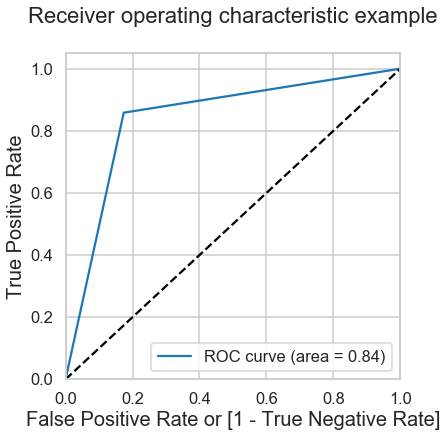

In [144]:
# let us draw ROC Curve for 50%
fpr, tpr, thresholds = metrics.roc_curve(  y_predict_churn_0_5.churn, y_predict_churn_0_5.final_predicted,
                                          drop_intermediate = False )
auc_score = metrics.roc_auc_score( y_predict_churn_0_5.churn, y_predict_churn_0_5.final_predicted )
plt.figure(figsize=(6, 6))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [145]:
print("roc_auc_score : {:2.2f}".format(metrics.roc_auc_score(y_predict_churn_0_5.churn, y_predict_churn_0_5.final_predicted)))

roc_auc_score : 0.84


In [146]:
### let us find optimal cut off now>

In [147]:
# accuracy, Sensitivity and specificity curve.

In [148]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_predict_churn_0_5[i]= y_predict_churn_0_5.churn_prob.map(lambda x: 1 if x > i else 0)
y_predict_churn_0_5.head()

,churn,churn_prob,final_predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
29172,0,0.001943,0,1,0,0,0,0,0,0,0,0,0
9013,0,0.129757,0,1,1,0,0,0,0,0,0,0,0
8741,0,0.014253,0,1,0,0,0,0,0,0,0,0,0
30680,1,0.833193,1,1,1,1,1,1,1,1,1,1,0
43716,1,0.704741,1,1,1,1,1,1,1,1,1,0,0


In [149]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_predict_churn_0_5.churn, y_predict_churn_0_5[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500885  1.000000  0.000000
0.1   0.1  0.709844  0.976136  0.442607
0.2   0.2  0.771224  0.953156  0.588647
0.3   0.3  0.806120  0.925549  0.686267
0.4   0.4  0.829844  0.896693  0.762757
0.5   0.5  0.842292  0.858324  0.826203
0.6   0.6  0.845286  0.814391  0.876291
0.7   0.7  0.830937  0.748830  0.913336
0.8   0.8  0.788125  0.631538  0.945268
0.9   0.9  0.637839  0.298742  0.978138


<Figure size 864x720 with 0 Axes>

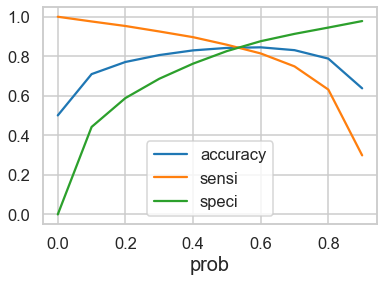

In [150]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize=[12,10])
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [151]:
## optimal cut off is about 0.45

In [152]:
# we run the model again with cut off 0.45

In [153]:
# let us set the cutoff as 0.5 (50% ) and cacluate churn.
predict_churn_0_45 = lr0.predict_proba(X_train_pca)[:,1]

In [154]:
y_predict_churn_0_45 = pd.DataFrame({'churn': y_train, 'churn_prob':predict_churn_0_45})

In [155]:
y_predict_churn_0_45['final_predicted'] = y_predict_churn_0_45.churn_prob.apply(lambda x: 1 if x > 0.45 else 0)

In [156]:
y_predict_churn_0_45.head()

,churn,churn_prob,final_predicted
29172,0,0.001943,0
9013,0,0.129757,0
8741,0,0.014253,0
30680,1,0.833193,1
43716,1,0.704741,1


In [157]:
# get the metrics
print( f"Accuracy: {metrics.roc_auc_score(y_predict_churn_0_45.churn,pred01 )}")
print( f"Recall / Sensitivity: {metrics.recall_score(y_train, pred01)}")

Accuracy: 0.8422632260641529
Recall / Sensitivity: 0.8583238016013309


In [158]:
## Making predictions on test set.

In [159]:
# let us set the cutoff as 0.45 (45% ) and calculate churn.
predict_test_045 = lr0.predict(X_test_pca)
predict_test_045_prob = lr0.predict_proba(X_test_pca)[:,1]
y_predict_test_045 = pd.DataFrame({'churn': y_test, 'churn_prob':predict_test_045})
y_predict_test_045['final_predicted'] = y_predict_test_045.churn_prob.apply(lambda x: 1 if x > 0.45 else 0)
y_predict_test_045.head()

,churn,churn_prob,final_predicted
5143,0,0,0
38093,1,1,1
42230,1,1,1
2887,0,0,0
2898,0,0,0


In [160]:
# get the metrics
print( f"Accuracy: {metrics.roc_auc_score(y_predict_test_045.churn,predict_test_045_prob )}")
print( f"Recall / Sensitivity: {metrics.recall_score(y_predict_test_045.churn, predict_test_045)}")

Accuracy: 0.9072330715288284
Recall / Sensitivity: 0.8567419158023185


###  2. Decision Trees.

In [161]:
# X_train_pca, X_test_pca, y_train, y_test

In [162]:
from sklearn.tree import DecisionTreeClassifier

#### Basic DT model

In [163]:
dt_base = DecisionTreeClassifier(random_state=42, max_depth=4)

In [164]:
dt_base.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [165]:
y_train_pred = dt_base.predict(X_train_pca)
y_test_pred = dt_base.predict(X_test_pca)

In [166]:
from sklearn.metrics import classification_report

In [167]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.76      0.79      8263
           1       0.77      0.82      0.80      8195

    accuracy                           0.79     16458
   macro avg       0.79      0.79      0.79     16458
weighted avg       0.79      0.79      0.79     16458



#### Plot the ROC curve

In [168]:
from sklearn.metrics import plot_roc_curve

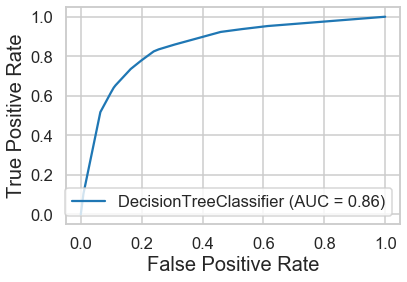

In [169]:
plot_roc_curve(dt_base, X_train_pca, y_train, drop_intermediate=False)
plt.show()

#### Hyper-parameter tuning for the Decision Tree

In [170]:
from sklearn.model_selection import GridSearchCV

In [171]:
dt = DecisionTreeClassifier(random_state=42)

In [172]:
params = {
    "max_depth": [2,3,5,10,20],
    "min_samples_leaf": [5,10,20,50,100,500]
}

In [173]:
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [174]:
%%time
grid_search.fit(X_train_pca, y_train)

Fitting 4 folds for each of 30 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   22.1s finished


Wall time: 25 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500]},
             scoring='accuracy', verbose=1)

In [175]:
grid_search.best_score_

0.8508854166666666

In [176]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, random_state=42)

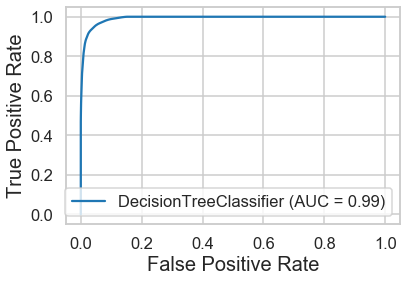

In [177]:
plot_roc_curve(dt_best, X_train_pca, y_train)
plt.show()

In [178]:
y_train_pred = dt_best.predict(X_train_pca)
y_test_pred = dt_best.predict(X_test_pca)

In [179]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95     19166
           1       0.95      0.96      0.95     19234

    accuracy                           0.95     38400
   macro avg       0.95      0.95      0.95     38400
weighted avg       0.95      0.95      0.95     38400



In [180]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86      8263
           1       0.85      0.88      0.86      8195

    accuracy                           0.86     16458
   macro avg       0.86      0.86      0.86     16458
weighted avg       0.86      0.86      0.86     16458



### 3. Random Forest

In [181]:
from sklearn.ensemble import RandomForestClassifier

In [182]:
rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True)

In [183]:
%%time
rf.fit(X_train_pca, y_train)

Wall time: 578 ms


RandomForestClassifier(max_depth=4, max_features=5, n_estimators=10,
                       oob_score=True, random_state=100)

In [184]:
rf.oob_score_

0.7546354166666667

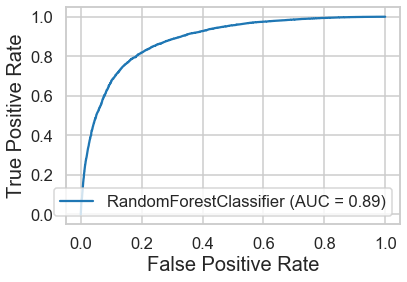

In [185]:
plot_roc_curve(rf, X_train_pca, y_train)
plt.show()

#### Hyper-parameter tuning for the Random Forest

In [186]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [187]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [188]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [189]:
%%time
grid_search.fit(X_train_pca, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   51.5s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  4.6min finished


Wall time: 4min 39s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [190]:
grid_search.best_score_

0.9178906250000001

In [191]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

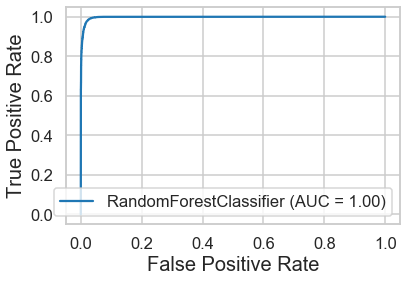

In [192]:
plot_roc_curve(rf_best, X_train_pca, y_train)
plt.show()

In [193]:
X_train_pca.shape

(38400, 60)

In [194]:
X_smote.shape

(54858, 144)

In [195]:
rf_best.feature_importances_

array([0.11263721, 0.06419568, 0.02987041, 0.0169664 , 0.04578047,
       0.05343613, 0.02079815, 0.01477126, 0.01556493, 0.01162809,
       0.08872731, 0.00947228, 0.02684934, 0.01546731, 0.02194777,
       0.01214193, 0.01886784, 0.01392629, 0.01072953, 0.01389584,
       0.01819344, 0.01473998, 0.00697874, 0.00906081, 0.00849629,
       0.00759164, 0.0160709 , 0.01057306, 0.01319513, 0.00663266,
       0.00748834, 0.00925157, 0.01050171, 0.00893387, 0.00720013,
       0.00902636, 0.01003646, 0.00848104, 0.00816039, 0.00940751,
       0.01209254, 0.01211723, 0.00899982, 0.01239347, 0.01095674,
       0.00652646, 0.00822086, 0.0081219 , 0.00941063, 0.00846445,
       0.01084639, 0.00904356, 0.00828219, 0.00781953, 0.00785267,
       0.00717333, 0.00770931, 0.00804884, 0.00986021, 0.00836569])

In [196]:
# summarize all three models? here??

### We apply Modelling techniques on this (Without PCA dataset) using basic Logistic Regression model
### LogisticRegression

#### Generating top correlations between the variables

In [197]:
X_train.shape

(38400, 141)

In [198]:
corr1=X_train.corr()
corr1 = corr1.where( np.triu(np.ones(corr1.shape),k=1).astype(bool))
corrdf1 = corr1.unstack().reset_index()
corrdf1.columns = ['VAR1', 'VAR2', 'Correlation']
corrdf1.dropna(subset = ['Correlation'], inplace=True)
corrdf1['Correlation'] = round(corrdf1['Correlation'],2)
corrdf1['Correlation'] = corrdf1['Correlation'].abs()
corrdf1.sort_values(by ='Correlation', ascending=False,inplace=True)
corrdf1.head(100)

,VAR1,VAR2,Correlation
19136,total_rech_count_8,total_rech_data_8,1.00
18994,total_rech_count_7,total_rech_data_7,1.00
18852,total_rech_count_6,total_rech_data_6,1.00
15759,arpu_2g_6,arpu_3g_6,0.95
16043,arpu_2g_8,arpu_3g_8,0.95
19742,total_rch_8,arpu_8,0.95
15901,arpu_2g_7,arpu_3g_7,0.95
19458,total_rch_6,arpu_6,0.94
19600,total_rch_7,arpu_7,0.92
8940,loc_ic_mou_6,loc_ic_t2m_mou_6,0.91


#### Dropping highly correlated dummy variables (>=0.80)

In [199]:
X_train.drop(['total_rech_data_8','total_rech_data_7','total_rech_data_6','arpu_3g_6','arpu_3g_8','arpu_8','arpu_3g_7','arpu_6','arpu_7','loc_ic_t2m_mou_6','loc_ic_t2m_mou_8','onnet_mou_7',
'loc_ic_mou_8','onnet_mou_6','loc_ic_mou_6','loc_ic_t2m_mou_7','onnet_mou_8','loc_ic_mou_7','offnet_mou_7','max_rech_data_7','std_og_mou_7','max_rech_data_6','arpu_2g_8',
'std_ic_t2m_mou_8','arpu_2g_6','arpu_2g_7','max_rech_data_8','av_rech_amt_data_8','arpu_3g_8','av_rech_amt_data_6','av_rech_amt_data_6','total_rech_data_8',
'loc_og_t2m_mou_8','arpu_3g_6','arpu_3g_7','sachet_2g_8','std_ic_t2m_mou_7','std_og_mou_6','offnet_mou_6','total_rech_data_7','av_rech_amt_data_7','av_rech_amt_data_8',
'av_rech_amt_data_7','std_ic_t2m_mou_6','max_rech_amt_7','std_og_mou_8','sachet_2g_7','av_rech_amt_data_8','sachet_2g_6','av_rech_amt_data_7','av_rech_amt_data_6',
'total_rech_data_6','loc_og_t2m_mou_7','max_rech_amt_6','loc_og_t2m_mou_6','loc_ic_t2m_mou_8','roam_ic_mou_7','roam_ic_mou_6','offnet_mou_8','loc_og_t2t_mou_7',
'loc_ic_mou_7','loc_og_mou_7','loc_ic_t2m_mou_7','loc_ic_mou_6','roam_ic_mou_8','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7'],axis=1,inplace=True)

In [200]:
X_train.shape

(38400, 92)

In [201]:
corr2=X_train.corr()
corr2 = corr2.where( np.triu(np.ones(corr2.shape),k=1).astype(bool))
corrdf2 = corr2.unstack().reset_index()
corrdf2.columns = ['VAR1', 'VAR2', 'Correlation']
corrdf2.dropna(subset = ['Correlation'], inplace=True)
corrdf2['Correlation'] = round(corrdf2['Correlation'],2)
corrdf2['Correlation'] = corrdf2['Correlation'].abs()
corrdf2.sort_values(by ='Correlation', ascending=False,inplace=True)
corrdf2.head(20)

,VAR1,VAR2,Correlation
3254,loc_ic_t2t_mou_7,loc_ic_t2t_mou_6,0.79
4742,total_ic_mou_8,total_ic_mou_7,0.78
3347,loc_ic_t2t_mou_8,loc_ic_t2t_mou_7,0.78
3626,loc_ic_t2f_mou_8,loc_ic_t2f_mou_7,0.78
557,loc_og_t2f_mou_7,loc_og_t2f_mou_6,0.78
3533,loc_ic_t2f_mou_7,loc_ic_t2f_mou_6,0.78
1108,loc_og_mou_8,loc_og_t2t_mou_8,0.77
650,loc_og_t2f_mou_8,loc_og_t2f_mou_7,0.76
4649,total_ic_mou_7,total_ic_mou_6,0.76
1015,loc_og_mou_6,loc_og_t2t_mou_6,0.75


In [202]:
# Removing high correlated variabes (>75%)

In [203]:
cols = ['total_rech_data_8', 'total_rech_data_7','total_rech_data_6','arpu_2g_6','arpu']

In [204]:
X_train.drop(['loc_ic_t2t_mou_6','total_ic_mou_7','loc_ic_t2t_mou_7','loc_ic_t2f_mou_7','loc_og_t2f_mou_6','loc_ic_t2f_mou_6','loc_og_t2t_mou_8','loc_og_t2f_mou_7','total_ic_mou_6','loc_og_t2t_mou_6'],axis=1,inplace=True)

In [205]:
X_train.shape

(38400, 82)

In [206]:
# Logistic regression model
import statsmodels.api as sm
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38400
Model:                            GLM   Df Residuals:                    38319
Model Family:                Binomial   Df Model:                           80
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14578.
Date:                Sun, 29 Nov 2020   Deviance:                       29155.
Time:                        12:54:11   Pearson chi2:                 1.52e+05
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.9242      0.029    -66.593      0.000      -1.981      -1.868
roam_og_mou_6          0.0502      0.019      2.597      0.009       0.012       0.088
roam_og_mou_7          0.0493      0.020      2.428      0.015       0.009       0.089
roam_og_mou_8          0.2065      0.020     10.484      0.000       0.168       0.245
loc_og_t2f_mou_8      -0.0802      0.030     -2.630      0.009      -0.140      -0.020
loc_og_t2c_mou_6      -0.0459      0.021     -2.226      0.026      -0.086      -0.005
loc_og_t2c_mou_7      -0.0158      0.022     -0.705      0.481      -0.060       0.028
loc_og_t2c_mou_8       0.0643      0.025      2.609      0.009       0.016       0.113
loc_og_mou_6           0.3570      0.060      5.945      0.000       0.239       0.475
loc_og_mou_8          -0.9725      0.090    -10.846      0.000      -1.148      -0.797
std_og_t2t_mou_6       0.3062      0.061      5.043      0.000       0.187       0.425
std_og_t2t_mou_7      -0.3327      0.054     -6.156      0.000      -0.439      -0.227
std_og_t2t_mou_8      -0.0376      0.096     -0.391      0.696      -0.226       0.151
std_og_t2m_mou_6       0.2345      0.061      3.858      0.000       0.115       0.354
std_og_t2m_mou_7      -0.1201      0.055     -2.167      0.030      -0.229      -0.011
std_og_t2m_mou_8      -0.1793      0.092     -1.944      0.052      -0.360       0.002
std_og_t2f_mou_6      -0.0623      0.027     -2.292      0.022      -0.116      -0.009
std_og_t2f_mou_7      -0.0114      0.030     -0.384      0.701      -0.070       0.047
std_og_t2f_mou_8      -0.1128      0.035     -3.249      0.001      -0.181      -0.045
isd_og_mou_6           0.0902      0.022      4.096      0.000       0.047       0.133
isd_og_mou_7          -0.0086      0.024     -0.367      0.714      -0.055       0.038
isd_og_mou_8           0.0122      0.024      0.499      0.618      -0.036       0.060
spl_og_mou_6          -0.0744      0.023     -3.223      0.001      -0.120      -0.029
spl_og_mou_7          -0.0174      0.026     -0.678      0.498      -0.068       0.033
spl_og_mou_8          -0.0336      0.029     -1.169      0.242      -0.090       0.023
og_others_6           -0.0144      0.018     -0.821      0.412      -0.049       0.020
og_others_7        -2.168e-15   8.59e-16     -2.522      0.012   -3.85e-15   -4.83e-16
og_others_8        -1.546e-15   6.37e-16     -2.428      0.015   -2.79e-15   -2.98e-16
total_og_mou_6        -0.3532      0.094     -3.772      0.000      -0.537      -0.170
total_og_mou_7         0.6229      0.077      8.126      0.000       0.473       0.773
total_og_mou_8        -0.4218      0.156     -2.698      0.007      -0.728      -0.115
loc_ic_t2t_mou_8       0.3414      0.042      8.163      0.000       0.259       0.423
loc_ic_t2f_mou_8       0.0291      0.0

`Too many variables, lots of p-values indicating insignificance of few independent variables`

In [207]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [208]:
# Check for the VIF values of the feature variables.
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
29,total_og_mou_8,50.90
27,total_og_mou_6,33.76
28,total_og_mou_7,19.24
11,std_og_t2t_mou_8,17.02
12,std_og_t2m_mou_6,16.64
9,std_og_t2t_mou_6,15.93
14,std_og_t2m_mou_8,15.55
8,loc_og_mou_8,14.75
13,std_og_t2m_mou_7,11.23
10,std_og_t2t_mou_7,10.64


**Lot of variables have very high vif, better to approach via RFE**

##### Feature Selection Using RFE (lets do about 40 variables max)

In [209]:
logreg = LogisticRegression()
rfe = RFE(logreg, 40)             # running RFE with 60 variables as output
rfe = rfe.fit(X_train, y_train)

In [211]:
rfe.support_

array([False, False,  True, False, False, False, False,  True,  True,
        True,  True, False,  True,  True,  True, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
        True,  True,  True,  True, False, False,  True,  True, False,
       False, False,  True,  True,  True,  True, False, False,  True,
       False, False,  True, False, False, False,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True, False, False,
        True, False, False, False,  True,  True, False, False,  True,
        True,  True, False, False,  True,  True, False, False,  True,
        True])

In [212]:
cols = X_train.columns[rfe.support_]
X_train = X_train[cols]
X_train.head()

,roam_og_mou_8,loc_og_mou_6,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_8,spl_og_mou_6,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_8,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,last_day_rch_amt_7,last_day_rch_amt_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_8,aon,vbc_3g_8,vol_data_mb_6,vol_data_mb_7,vol_data_mb_8,total_rech_count_8,avg_rchg_amt_6,total_rch_7,total_rch_8
29172,-0.285592,-0.006932,0.417118,-0.510768,-0.515750,-0.545353,-0.542754,-0.506988,7.115084,0.116119,-0.645613,-0.577935,-0.266895,0.029694,-0.405566,-0.387552,-0.516223,-0.510513,-0.504300,-0.389430,-0.262124,-0.258485,-0.810456,-0.655479,-0.011134,0.077112,0.347961,2.397437,-0.344176,5.425791,-0.324386,-0.105444,-0.378608,-0.302228,-0.267320,-0.244228,0.554444,0.290627,-0.064435,1.737034
9013,-0.285592,-0.044733,0.621709,-0.510768,-0.515750,2.966388,2.473933,2.377094,-0.242667,-0.464122,1.385307,1.206436,1.302985,-0.259072,-0.405566,-0.387870,-0.360971,-0.389711,-0.363022,-0.078891,-0.262124,-0.258485,0.000822,-0.428984,-0.240763,0.077112,0.474863,-0.338286,-0.344176,-0.324697,-0.324386,-0.558643,-0.378608,-0.460423,-0.467891,-0.450443,-0.527274,0.000422,0.149379,0.607025
8741,-0.107234,0.343447,0.416958,0.267121,0.125825,4.914943,5.050015,5.168311,-0.242667,-0.464122,3.404313,3.700180,3.675130,1.265314,0.091498,-0.201473,0.378537,0.162126,0.051122,0.288076,-0.262124,-0.250055,4.173111,2.628690,2.285159,0.237238,-0.449707,-0.338286,-0.344176,-0.324697,-0.324386,2.454462,-0.378608,-0.460423,-0.467891,-0.450443,0.013585,-0.798752,1.883914,1.596619
30680,-0.250079,-0.663464,-0.752453,-0.502383,-0.515127,-0.457782,-0.301593,-0.470505,-0.242667,-0.460133,-0.960890,-0.416189,-0.939110,-0.582072,-0.314578,0.264703,-0.233271,0.618673,-0.229224,-0.693386,-0.262124,-0.024124,-1.060510,-0.759804,-0.823881,0.845508,-0.830412,-0.338286,2.513709,-0.324697,-0.324386,-1.078560,-0.291950,-0.460423,0.535667,-0.450443,-0.527274,-0.216546,-0.268732,-1.314622
43716,-0.164261,-0.692454,-0.797552,0.726927,-0.515750,2.696311,-0.542754,-0.093945,-0.242667,0.647978,1.637451,-1.115716,-0.738755,-0.627768,-0.405566,-0.387870,-0.389594,-0.519764,-0.500447,-0.905786,-0.262124,-0.258485,4.030684,-1.221715,-0.547860,-0.901440,-0.830412,-0.338286,-0.344176,-0.324697,-0.324386,-0.870346,-0.378608,-0.460423,-0.467891,-0.450443,-0.527274,-1.019980,-1.645216,-1.125490


In [213]:
# Creating model after RFE
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38400
Model:                            GLM   Df Residuals:                    38359
Model Family:                Binomial   Df Model:                           40
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14682.
Date:                Sun, 29 Nov 2020   Deviance:                       29365.
Time:                        13:13:52   Pearson chi2:                 1.44e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.9118      0.028    -67.198      0.000      -1.968      -1.856
roam_og_mou_8          0.2426      0.016     15.628      0.000       0.212       0.273
loc_og_mou_6           0.2720      0.058      4.697      0.000       0.158       0.385
loc_og_mou_8          -0.9710      0.060    -16.276      0.000      -1.088      -0.854
std_og_t2t_mou_6       0.2330      0.059      3.944      0.000       0.117       0.349
std_og_t2t_mou_7      -0.3468      0.050     -6.890      0.000      -0.445      -0.248
std_og_t2m_mou_6       0.1652      0.059      2.799      0.005       0.050       0.281
std_og_t2m_mou_7      -0.1197      0.054     -2.225      0.026      -0.225      -0.014
std_og_t2m_mou_8      -0.1580      0.041     -3.819      0.000      -0.239      -0.077
std_og_t2f_mou_8      -0.1803      0.027     -6.640      0.000      -0.234      -0.127
spl_og_mou_6          -0.1208      0.017     -7.105      0.000      -0.154      -0.087
total_og_mou_6        -0.2547      0.090     -2.824      0.005      -0.431      -0.078
total_og_mou_7         0.5785      0.072      8.087      0.000       0.438       0.719
total_og_mou_8        -0.4794      0.052     -9.287      0.000      -0.581      -0.378
loc_ic_t2t_mou_8       0.3538      0.041      8.622      0.000       0.273       0.434
std_ic_t2t_mou_7       0.1384      0.030      4.597      0.000       0.079       0.197
std_ic_t2t_mou_8      -0.2235      0.038     -5.820      0.000      -0.299      -0.148
std_ic_mou_6           0.1552      0.026      6.037      0.000       0.105       0.206
std_ic_mou_7          -0.1320      0.038     -3.481      0.000      -0.206      -0.058
std_ic_mou_8           0.3019      0.047      6.374      0.000       0.209       0.395
total_ic_mou_8        -1.5647      0.067    -23.250      0.000      -1.697      -1.433
spl_ic_mou_8          -0.4732      0.026    -17.915      0.000      -0.525      -0.421
isd_ic_mou_8           0.2636      0.023     11.609      0.000       0.219       0.308
total_rech_num_6       0.1400      0.025      5.625      0.000       0.091       0.189
total_rech_num_7       0.1893      0.033      5.681      0.000       0.124       0.255
total_rech_num_8      -0.7585      0.038    -19.882      0.000      -0.833      -0.684
last_day_rch_amt_7    -0.1457      0.021     -7.009      0.000      -0.186      -0.105
last_day_rch_amt_8    -0.5498      0.024    -22.466      0.000      -0.598      -0.502
monthly_2g_6          -0.1210      0.025     -4.794      0.000      -0.170      -0.072
monthly_2g_7          -0.1054      0.027     -3.893      0.000      -0.159      -0.052
monthly_2g_8          -0.4512      0.037    -12.166      0.000      -0.524      -0.378
monthly_3g_8          -0.2985      0.038     -7.850      0.000      -0.373      -0.224
aon                   -0.3745      0.0

In [214]:
# check VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,total_og_mou_6,30.92
11,total_og_mou_7,16.84
5,std_og_t2m_mou_6,15.79
3,std_og_t2t_mou_6,15.17
6,std_og_t2m_mou_7,10.64
1,loc_og_mou_6,9.36
4,std_og_t2t_mou_7,9.31
12,total_og_mou_8,8.84
39,total_rch_8,6.92
2,loc_og_mou_8,5.73


In [215]:
# manually drop variables with High VIF first, then drop variables with p-value > 0.05 (5%)
X_train.drop('total_og_mou_6',inplace=True,axis=1)

In [216]:
# Creating model after RFE
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38400
Model:                            GLM   Df Residuals:                    38360
Model Family:                Binomial   Df Model:                           39
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14686.
Date:                Sun, 29 Nov 2020   Deviance:                       29373.
Time:                        13:13:56   Pearson chi2:                 1.43e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.9086      0.028    -67.206      0.000      -1.964      -1.853
roam_og_mou_8          0.2427      0.016     15.644      0.000       0.212       0.273
loc_og_mou_6           0.1335      0.031      4.368      0.000       0.074       0.193
loc_og_mou_8          -0.9473      0.059    -16.084      0.000      -1.063      -0.832
std_og_t2t_mou_6       0.0782      0.022      3.594      0.000       0.036       0.121
std_og_t2t_mou_7      -0.3217      0.050     -6.497      0.000      -0.419      -0.225
std_og_t2m_mou_6       0.0102      0.021      0.474      0.635      -0.032       0.052
std_og_t2m_mou_7      -0.0981      0.053     -1.843      0.065      -0.202       0.006
std_og_t2m_mou_8      -0.1546      0.041     -3.729      0.000      -0.236      -0.073
std_og_t2f_mou_8      -0.1828      0.027     -6.741      0.000      -0.236      -0.130
spl_og_mou_6          -0.1265      0.017     -7.495      0.000      -0.160      -0.093
total_og_mou_7         0.5401      0.070      7.695      0.000       0.403       0.678
total_og_mou_8        -0.4863      0.052     -9.414      0.000      -0.588      -0.385
loc_ic_t2t_mou_8       0.3497      0.041      8.503      0.000       0.269       0.430
std_ic_t2t_mou_7       0.1361      0.030      4.525      0.000       0.077       0.195
std_ic_t2t_mou_8      -0.2193      0.038     -5.721      0.000      -0.294      -0.144
std_ic_mou_6           0.1545      0.026      6.013      0.000       0.104       0.205
std_ic_mou_7          -0.1280      0.038     -3.379      0.001      -0.202      -0.054
std_ic_mou_8           0.2994      0.047      6.326      0.000       0.207       0.392
total_ic_mou_8        -1.5625      0.067    -23.242      0.000      -1.694      -1.431
spl_ic_mou_8          -0.4733      0.026    -17.907      0.000      -0.525      -0.422
isd_ic_mou_8           0.2614      0.023     11.516      0.000       0.217       0.306
total_rech_num_6       0.1311      0.025      5.317      0.000       0.083       0.179
total_rech_num_7       0.1926      0.033      5.785      0.000       0.127       0.258
total_rech_num_8      -0.7558      0.038    -19.826      0.000      -0.831      -0.681
last_day_rch_amt_7    -0.1443      0.021     -6.949      0.000      -0.185      -0.104
last_day_rch_amt_8    -0.5474      0.024    -22.399      0.000      -0.595      -0.500
monthly_2g_6          -0.1222      0.025     -4.840      0.000      -0.172      -0.073
monthly_2g_7          -0.1058      0.027     -3.910      0.000      -0.159      -0.053
monthly_2g_8          -0.4512      0.037    -12.175      0.000      -0.524      -0.379
monthly_3g_8          -0.2981      0.038     -7.852      0.000      -0.373      -0.224
aon                   -0.3750      0.019    -19.408      0.000      -0.413      -0.337
vbc_3g_8              -0.1392      0.0

In [217]:
# check VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,total_og_mou_7,16.16
6,std_og_t2m_mou_7,10.48
4,std_og_t2t_mou_7,9.06
11,total_og_mou_8,8.82
38,total_rch_8,6.92
2,loc_og_mou_8,5.66
34,vol_data_mb_8,4.95
17,std_ic_mou_8,4.61
7,std_og_t2m_mou_8,4.52
16,std_ic_mou_7,4.40


In [218]:
# lets drop total_rch_8 also
X_train.drop('total_og_mou_7',inplace=True,axis=1)

In [219]:
#lets model again
# Creating model after RFE
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38400
Model:                            GLM   Df Residuals:                    38361
Model Family:                Binomial   Df Model:                           38
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14716.
Date:                Sun, 29 Nov 2020   Deviance:                       29432.
Time:                        13:13:59   Pearson chi2:                 1.70e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.8907      0.028    -67.251      0.000      -1.946      -1.836
roam_og_mou_8          0.2440      0.016     15.694      0.000       0.214       0.274
loc_og_mou_6           0.2418      0.028      8.699      0.000       0.187       0.296
loc_og_mou_8          -0.7787      0.054    -14.330      0.000      -0.885      -0.672
std_og_t2t_mou_6       0.0781      0.022      3.605      0.000       0.036       0.121
std_og_t2t_mou_7      -0.0174      0.030     -0.580      0.562      -0.076       0.041
std_og_t2m_mou_6       0.0060      0.021      0.281      0.779      -0.036       0.048
std_og_t2m_mou_7       0.2298      0.032      7.204      0.000       0.167       0.292
std_og_t2m_mou_8      -0.1746      0.041     -4.238      0.000      -0.255      -0.094
std_og_t2f_mou_8      -0.1809      0.027     -6.660      0.000      -0.234      -0.128
spl_og_mou_6          -0.1154      0.017     -6.863      0.000      -0.148      -0.082
total_og_mou_8        -0.4343      0.051     -8.487      0.000      -0.535      -0.334
loc_ic_t2t_mou_8       0.3481      0.041      8.449      0.000       0.267       0.429
std_ic_t2t_mou_7       0.1352      0.030      4.492      0.000       0.076       0.194
std_ic_t2t_mou_8      -0.2195      0.038     -5.717      0.000      -0.295      -0.144
std_ic_mou_6           0.1456      0.026      5.676      0.000       0.095       0.196
std_ic_mou_7          -0.1100      0.038     -2.909      0.004      -0.184      -0.036
std_ic_mou_8           0.2821      0.047      5.962      0.000       0.189       0.375
total_ic_mou_8        -1.5546      0.067    -23.145      0.000      -1.686      -1.423
spl_ic_mou_8          -0.4749      0.026    -17.979      0.000      -0.527      -0.423
isd_ic_mou_8           0.2607      0.023     11.473      0.000       0.216       0.305
total_rech_num_6       0.1210      0.025      4.912      0.000       0.073       0.169
total_rech_num_7       0.2286      0.033      6.908      0.000       0.164       0.294
total_rech_num_8      -0.7855      0.038    -20.676      0.000      -0.860      -0.711
last_day_rch_amt_7    -0.1575      0.021     -7.604      0.000      -0.198      -0.117
last_day_rch_amt_8    -0.5494      0.024    -22.474      0.000      -0.597      -0.501
monthly_2g_6          -0.1184      0.025     -4.697      0.000      -0.168      -0.069
monthly_2g_7          -0.1022      0.027     -3.792      0.000      -0.155      -0.049
monthly_2g_8          -0.4481      0.037    -12.092      0.000      -0.521      -0.375
monthly_3g_8          -0.2954      0.038     -7.768      0.000      -0.370      -0.221
aon                   -0.3751      0.019    -19.443      0.000      -0.413      -0.337
vbc_3g_8              -0.1389      0.032     -4.342      0.000      -0.202      -0.076
vol_data_mb_6          0.1309      0.0

In [220]:
# check VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,total_og_mou_8,8.63
37,total_rch_8,6.81
33,vol_data_mb_8,4.95
2,loc_og_mou_8,4.88
16,std_ic_mou_8,4.61
7,std_og_t2m_mou_8,4.48
15,std_ic_mou_7,4.39
17,total_ic_mou_8,4.30
22,total_rech_num_8,4.19
6,std_og_t2m_mou_7,4.10


In [221]:
# lets drop total_rch_8 also
X_train.drop('total_og_mou_8',inplace=True,axis=1)

In [222]:
# check VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
36,total_rch_8,5.83
32,vol_data_mb_8,4.94
15,std_ic_mou_8,4.61
14,std_ic_mou_7,4.39
16,total_ic_mou_8,4.29
6,std_og_t2m_mou_7,4.10
21,total_rech_num_8,4.10
20,total_rech_num_7,4.06
2,loc_og_mou_8,3.53
31,vol_data_mb_7,3.28


In [223]:
# lets drop total_rch_8 also
X_train.drop('total_rch_8',inplace=True,axis=1)

In [224]:
# check VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
32,vol_data_mb_8,4.92
15,std_ic_mou_8,4.60
14,std_ic_mou_7,4.39
16,total_ic_mou_8,4.27
6,std_og_t2m_mou_7,4.06
20,total_rech_num_7,3.84
31,vol_data_mb_7,3.27
2,loc_og_mou_8,3.24
12,std_ic_t2t_mou_8,3.13
21,total_rech_num_8,3.04


In [225]:
X_train.shape

(38400, 36)

In [226]:
# Creating model after RFE
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38400
Model:                            GLM   Df Residuals:                    38363
Model Family:                Binomial   Df Model:                           36
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14773.
Date:                Sun, 29 Nov 2020   Deviance:                       29547.
Time:                        13:14:11   Pearson chi2:                 1.46e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.9034      0.028    -67.264      0.000      -1.959      -1.848
roam_og_mou_8          0.2503      0.014     17.469      0.000       0.222       0.278
loc_og_mou_6           0.2511      0.028      9.027      0.000       0.197       0.306
loc_og_mou_8          -1.0045      0.050    -20.259      0.000      -1.102      -0.907
std_og_t2t_mou_6       0.0752      0.021      3.565      0.000       0.034       0.117
std_og_t2t_mou_7      -0.1818      0.024     -7.695      0.000      -0.228      -0.135
std_og_t2m_mou_6   -3.665e-05      0.021     -0.002      0.999      -0.042       0.042
std_og_t2m_mou_7       0.2486      0.032      7.826      0.000       0.186       0.311
std_og_t2m_mou_8      -0.4396      0.032    -13.879      0.000      -0.502      -0.378
std_og_t2f_mou_8      -0.1867      0.027     -6.852      0.000      -0.240      -0.133
spl_og_mou_6          -0.1159      0.017     -6.911      0.000      -0.149      -0.083
loc_ic_t2t_mou_8       0.3485      0.042      8.367      0.000       0.267       0.430
std_ic_t2t_mou_7       0.1574      0.030      5.226      0.000       0.098       0.216
std_ic_t2t_mou_8      -0.2637      0.038     -6.870      0.000      -0.339      -0.188
std_ic_mou_6           0.1487      0.026      5.768      0.000       0.098       0.199
std_ic_mou_7          -0.0963      0.038     -2.530      0.011      -0.171      -0.022
std_ic_mou_8           0.2831      0.048      5.928      0.000       0.190       0.377
total_ic_mou_8        -1.5910      0.068    -23.546      0.000      -1.723      -1.459
spl_ic_mou_8          -0.4772      0.027    -18.005      0.000      -0.529      -0.425
isd_ic_mou_8           0.2633      0.023     11.563      0.000       0.219       0.308
total_rech_num_6       0.1219      0.025      4.951      0.000       0.074       0.170
total_rech_num_7       0.3062      0.032      9.558      0.000       0.243       0.369
total_rech_num_8      -0.9494      0.033    -28.979      0.000      -1.014      -0.885
last_day_rch_amt_7    -0.1512      0.021     -7.372      0.000      -0.191      -0.111
last_day_rch_amt_8    -0.6010      0.022    -26.781      0.000      -0.645      -0.557
monthly_2g_6          -0.1207      0.025     -4.780      0.000      -0.170      -0.071
monthly_2g_7          -0.1014      0.027     -3.753      0.000      -0.154      -0.048
monthly_2g_8          -0.4552      0.037    -12.300      0.000      -0.528      -0.383
monthly_3g_8          -0.2991      0.038     -7.930      0.000      -0.373      -0.225
aon                   -0.3746      0.019    -19.421      0.000      -0.412      -0.337
vbc_3g_8              -0.1415      0.032     -4.418      0.000      -0.204      -0.079
vol_data_mb_6          0.1277      0.027      4.772      0.000       0.075       0.180
vol_data_mb_7          0.1973      0.0

### Ok , so all the variables are now p-values < 0.05 and VIFs stable. we can take this as our final model

In [227]:
X_train_sm.shape

(38400, 37)

In [228]:
y_train.shape

(38400,)

In [229]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

29172    0.001970
9013     0.089706
8741     0.021684
30680    0.755020
43716    0.786269
17901    0.653519
52619    0.846029
3882     0.192238
23068    0.047857
44095    0.457830
dtype: float64

In [230]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00196966, 0.08970637, 0.02168361, 0.75502039, 0.78626892,
       0.6535189 , 0.8460293 , 0.1922382 , 0.04785749, 0.45782976])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [231]:
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'churn_Prob':y_train_pred})
y_train_pred_final['ID'] = y_train.index
y_train_pred_final.head()

,churn,churn_Prob,ID
0,0,0.001970,29172
1,0,0.089706,9013
2,0,0.021684,8741
3,1,0.755020,30680
4,1,0.786269,43716


**Creating new column 'predicted' with 1 if churn > 0.45 else 0 [ we obtained the cutoff as 0.45 from the PCA  exercise. lets reuse it directly]**

In [232]:
y_train_pred_final['predicted'] = y_train_pred_final.churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,churn,churn_Prob,ID,predicted
0,0,0.001970,29172,0
1,0,0.089706,9013,0
2,0,0.021684,8741,0
3,1,0.755020,30680,1
4,1,0.786269,43716,1


In [233]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final.predicted )
print(confusion)

[[15758  3408]
 [ 2668 16566]]


In [234]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.churn, y_train_pred_final.predicted))

0.8417708333333334


In [235]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.00196966, 0.08970637, 0.02168361, 0.75502039, 0.78626892,
       0.6535189 , 0.8460293 , 0.1922382 , 0.04785749, 0.45782976])

In [236]:
y_train_pred_final['churn_Prob'] = y_train_pred

In [237]:
# Creating new column 'predicted' with 1 if convert_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.churn_Prob.map(lambda x: 1 if x > 0.45 else 0)
y_train_pred_final.head()

,churn,churn_Prob,ID,predicted
0,0,0.001970,29172,0
1,0,0.089706,9013,0
2,0,0.021684,8741,0
3,1,0.755020,30680,1
4,1,0.786269,43716,1


In [238]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.churn, y_train_pred_final.predicted))

0.8367447916666667


**Accuracy score is about 85%**

In [239]:
# lets do predictions on test set.

In [240]:
X_test = X_test[X_train.columns]

In [241]:
x_test_sm = sm.add_constant(X_test)

In [242]:
y_test_predict = res.predict(x_test_sm).values.reshape(-1)

In [243]:
y_test_predict[:10]

array([0.06266336, 0.42028329, 0.89412378, 0.07087385, 0.12864864,
       0.03663321, 0.57235179, 0.11589024, 0.67436187, 0.04869681])

In [244]:
y_test_pred_final = pd.DataFrame({'churn':y_test.values, 'churn_Prob':y_test_predict})
y_test_pred_final['ID'] = y_test.index
y_test_pred_final.head()

,churn,churn_Prob,ID
0,0,0.062663,5143
1,1,0.420283,38093
2,1,0.894124,42230
3,0,0.070874,2887
4,0,0.128649,2898


In [245]:
# Creating new column 'predicted' with 1 if convert_Prob > 0.5 else 0
y_test_pred_final['predicted'] = y_test_pred_final.churn_Prob.map(lambda x: 1 if x > 0.45 else 0)
y_test_pred_final.head()

,churn,churn_Prob,ID,predicted
0,0,0.062663,5143,0
1,1,0.420283,38093,0
2,1,0.894124,42230,1
3,0,0.070874,2887,0
4,0,0.128649,2898,0


In [246]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_test_pred_final.churn, y_test_pred_final.predicted))

0.8355207194069754


**OK, so we got about 83% accuracy on the test set using the final model**

### Summary of the Modeling execrise:

looking at the model summary we can make out that: (some key parameters listed below)
the following parameters affect the churn postively, i.e. customers have churned due to following parameters:

1. roam_og_mou - roaming and outgoing not available/ not attractive plans.
2. local_og_mou - local outgoing has reduced, need to imporve on outgoing call plans and attractive tarrifs.
3. std_og_t2m_mou - STD facility outgoign between telecom to mobile - i.e. attractive plans on STD option calling should be arrived .
4. std_ic_t2t_mou - STD facility incoming between telecom to telecom has been reduced - indicating that incoming calls need to charged less
5. loc_ic_t2t_mou - incoming calls between same telecom operator - provide more attractive features.
6. std_ic_mou  - improve on std plans.
7. isd_ic_mou - improve on ISD plan traffis.
8. volume data (mobile data) - both 2g and 3g attractive offers can help improve on reducing churn.
9. recharge plan - make more options on recharge, so that customers retain connections by shorter refills.